# Restaurant Inspections

# Ayomide Hamzat

## Executive Summary

The goal is to build an MVP model to predict a restaurants grade in its next inspection based on results of past inspections. This is a binary classification problem in which the outcomes are either zero(0) or one(1)

Class zero(0) here means the restaurant scored above a C and class one(1) means the restaurant scored grade C and below. 

The workflow involves conducting an exploratory data analysis to identify trends in the dataset by visualizing the data with boxplots, histograms, countplots, distribution plots and matrix scatterplots. This step involves simultaneously cleaning the data and identifying variables that may contribute to the prediction model.

The next step was building the model. Some data transformation was carried out using column transformer where One-hot encoder to transform categorical data and minmaxscaler to scale the columns containing continuous variables. Minmaxscaler was chosen over standard scaler because a lot of the data was right skewed and standard scaler is best applied where the data follows some normal distribution across the mean.

Three models were tested on the dataset:
1. Support Vector Classifier
2. Ensemble model (Random Forest)
3. Non-parametric model (K-Nearest Neighbour)

The three models provided similar results in terms of accuracy and precision (84%). Precision was the chosen model validation method based on the assumption that the health and satisfaction of consumers is the priority; one would want to minimize the occurrence of false positives in grading a restaurant a restaurant higher than a C as this would mislead customers who would risk compromising their health and satisfaction. 

Support Vector Classifier was ultimately applied in making predictions for the test dataset and the results of the classifier prediction and the classifier probability were recorded in the attached "predictions_Hamzat_Ayomide.csv" file.

Some recommendations to improve the prediction and data includes more sampling of restaurants with grades of C and below, some data on guest/visitor profile, restaurant income and mode of operation.


## Workflow

### Importing all libraries

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing


### Read in Training Data

In [2]:
pd.set_option("display.max_columns", None) #to see all available columns

In [3]:
data = pd.read_csv("TRAIN_SET_2021.csv")
data.head() 

RESTAURANT_SERIAL_NUMBER RESTAURANT_PERMIT_NUMBER  \
0                DA1117270                PR0004527   
1                DA1014948                PR0024221   
2                DA0861994                PR0019017   
3                DA0896719                PR0001343   
4                DA1031041                PR0006084   

                     RESTAURANT_NAME              RESTAURANT_LOCATION  \
0      SANDS EXPO HALL B2 CONCESSION   SANDS EXPO & CONVENTION CENTER   
1     THAI NOODLES CAFE - RESTAURANT                THAI NOODLES CAFE   
2         SANTA FE SPORTS BOOK GRILL  Santa Fe Station Hotel & Casino   
3    Bracken, Walter Elem School Kit      Bracken, Walter Elem School   
4  HARD ROCK JOINT EAST SVC BAR FL 1         HARD ROCK HOTEL & CASINO   

         RESTAURANT_CATEGORY              ADDRESS       CITY   STATE  \
0                  Snack Bar      201 E Sands Ave  Las Vegas  Nevada   
1                 Restaurant  6710 W CHEYENNE Ave  Las Vegas  Nevada   
2                 Restaurant     4949 N Rancho Dr  Las Vegas  Nevada   
3  Elementary School Kitchen       1200 N 27Th St  Las Vegas  Nevada   
4               Bar / Tavern   4455 S Paradise Rd  Las Vegas  Nevada   

          ZIP  CURRENT_DEMERITS CURRENT_GRADE  EMPLOYEE_COUNT  \
0  89169-2617               0.0             A            25.0   
1  89108-4588               3.0             A             7.0   
2  89130-3505               8.0             A            23.0   
3  89101-1517               0.0             A            14.0   
4  89169-6574               0.0             A            10.0   

   MEDIAN_EMPLOYEE_AGE  MEDIAN_EMPLOYEE_TENURE   INSPECTION_TIME  \
0            27.959983               13.004886   11/5/2013 16:15   
1            27.719365                3.922086   9/21/2012 13:00   
2            26.442637               10.312777   9/16/2011 11:50   
3            33.988293                4.163975  11/22/2011 11:40   
4            21.980282               13.462786   11/9/2012 20:30   

      INSPECTION_TYPE INSPECTION_DEMERITS       VIOLATIONS_RAW  \
0  Routine Inspection                  11    2,042,153,022,955   
1  Routine Inspection                   9  214,216,229,230,233   
2  Routine Inspection                   9          202,215,233   
3  Routine Inspection                   5          214,230,233   
4  Routine Inspection                   5          214,230,233   

    RECORD_UPDATED               LAT_LONG_RAW  FIRST_VIOLATION  \
0   1/6/2015 16:34  (36.1221442, 115.1652749)            204.0   
1  2/21/2013 22:26    (36.218691, 115.242913)            214.0   
2    4/6/2015 9:00  (36.2498922, 115.2441383)            202.0   
3  2/21/2013 22:26    (36.183669, 115.112355)            214.0   
4  2/21/2013 22:26  (36.1100828, 115.1538714)            214.0   

   SECOND_VIOLATION  THIRD_VIOLATION FIRST_VIOLATION_TYPE  \
0             215.0            302.0             Critical   
1             216.0            229.0                Major   
2             215.0            233.0             Critical   
3             230.0            233.0                Major   
4             230.0            233.0                Major   

  SECOND_VIOLATION_TYPE    THIRD_VIOLATION_TYPE NUMBER_OF_VIOLATIONS  \
0                 Major  Imminent Health Hazard                    4   
1                 Major               Non-Major                    5   
2                 Major               Non-Major                    3   
3             Non-Major               Non-Major                    3   
4             Non-Major               Non-Major                  NaN   

  NEXT_INSPECTION_GRADE_C_OR_BELOW  
0                                0  
1                                0  
2                                1  
3                                0  
4                                0

In [4]:
data.shape

(15673, 28)

In [5]:
data.info() # to view each column and its datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15673 entries, 0 to 15672
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RESTAURANT_SERIAL_NUMBER          15673 non-null  object 
 1   RESTAURANT_PERMIT_NUMBER          15673 non-null  object 
 2   RESTAURANT_NAME                   15608 non-null  object 
 3   RESTAURANT_LOCATION               15473 non-null  object 
 4   RESTAURANT_CATEGORY               15543 non-null  object 
 5   ADDRESS                           15603 non-null  object 
 6   CITY                              15437 non-null  object 
 7   STATE                             15464 non-null  object 
 8   ZIP                               15614 non-null  object 
 9   CURRENT_DEMERITS                  15457 non-null  float64
 10  CURRENT_GRADE                     15365 non-null  object 
 11  EMPLOYEE_COUNT                    15580 non-null  float64
 12  MEDI

There are 7 numeric fields and 21 object or string fields

### Data Cleaning, Outlier Removal and Exploratory Data Analysis
1. Search for duplicate records

In [6]:
data.duplicated().sum()

0

2. We have to convert some datafields to numeric fields because their contents are numeric. Conversion will also aid data interpretation and visualization easier

In [7]:
data["NUMBER_OF_VIOLATIONS"] = pd.to_numeric(data['NUMBER_OF_VIOLATIONS'], errors ='coerce')
data["NUMBER_OF_VIOLATIONS"] = data['NUMBER_OF_VIOLATIONS'].astype('Int64')
data["INSPECTION_DEMERITS"] = pd.to_numeric(data['INSPECTION_DEMERITS'], errors ='coerce')
data["INSPECTION_DEMERITS"] = data['INSPECTION_DEMERITS'].astype('float64')
data['NEXT_INSPECTION_GRADE_C_OR_BELOW'] = pd.to_numeric(data['NEXT_INSPECTION_GRADE_C_OR_BELOW'], errors ='coerce')
data['NEXT_INSPECTION_GRADE_C_OR_BELOW'] = data['NEXT_INSPECTION_GRADE_C_OR_BELOW'].astype('float64')

3. Convert INSPECTION_TIME and 'RECORD_UPDATED' to datetime format

In [8]:
data['INSPECTION_TIME']=pd.to_datetime(data['INSPECTION_TIME'], errors = 'coerce')

In [9]:
data['RECORD_UPDATED']=pd.to_datetime(data['RECORD_UPDATED'], errors = 'coerce')

4. Create new columns for Hour, WeekDay, Month and Date of Inspection. We also do same for RECORD_UPDATED These values are easier to manage and provide more insight into the dependency of the next inspection grade on when the inspection was carried out.

In [10]:
data['Hour_of_inspection']=data['INSPECTION_TIME'].apply(lambda time : time.hour)
data['DayofWeek_of_inspection'] = data['INSPECTION_TIME'].apply(lambda time : time.dayofweek)
data['Month_of_inspection'] = data['INSPECTION_TIME'].apply(lambda time : time.month)
data['Date_of_inspection'] = data['INSPECTION_TIME'].apply(lambda t : t.date())

In [11]:
data['Hour_of_update']=data['RECORD_UPDATED'].apply(lambda time : time.hour)
data['DayofWeek_of_update'] = data['RECORD_UPDATED'].apply(lambda time : time.dayofweek)
data['Month_of_update'] = data['RECORD_UPDATED'].apply(lambda time : time.month)
data['Date_of_update'] = data['RECORD_UPDATED'].apply(lambda t : t.date())

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15673 entries, 0 to 15672
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   RESTAURANT_SERIAL_NUMBER          15673 non-null  object        
 1   RESTAURANT_PERMIT_NUMBER          15673 non-null  object        
 2   RESTAURANT_NAME                   15608 non-null  object        
 3   RESTAURANT_LOCATION               15473 non-null  object        
 4   RESTAURANT_CATEGORY               15543 non-null  object        
 5   ADDRESS                           15603 non-null  object        
 6   CITY                              15437 non-null  object        
 7   STATE                             15464 non-null  object        
 8   ZIP                               15614 non-null  object        
 9   CURRENT_DEMERITS                  15457 non-null  float64       
 10  CURRENT_GRADE                     15365 non-nu

In [13]:
data.head()

RESTAURANT_SERIAL_NUMBER RESTAURANT_PERMIT_NUMBER  \
0                DA1117270                PR0004527   
1                DA1014948                PR0024221   
2                DA0861994                PR0019017   
3                DA0896719                PR0001343   
4                DA1031041                PR0006084   

                     RESTAURANT_NAME              RESTAURANT_LOCATION  \
0      SANDS EXPO HALL B2 CONCESSION   SANDS EXPO & CONVENTION CENTER   
1     THAI NOODLES CAFE - RESTAURANT                THAI NOODLES CAFE   
2         SANTA FE SPORTS BOOK GRILL  Santa Fe Station Hotel & Casino   
3    Bracken, Walter Elem School Kit      Bracken, Walter Elem School   
4  HARD ROCK JOINT EAST SVC BAR FL 1         HARD ROCK HOTEL & CASINO   

         RESTAURANT_CATEGORY              ADDRESS       CITY   STATE  \
0                  Snack Bar      201 E Sands Ave  Las Vegas  Nevada   
1                 Restaurant  6710 W CHEYENNE Ave  Las Vegas  Nevada   
2                 Restaurant     4949 N Rancho Dr  Las Vegas  Nevada   
3  Elementary School Kitchen       1200 N 27Th St  Las Vegas  Nevada   
4               Bar / Tavern   4455 S Paradise Rd  Las Vegas  Nevada   

          ZIP  CURRENT_DEMERITS CURRENT_GRADE  EMPLOYEE_COUNT  \
0  89169-2617               0.0             A            25.0   
1  89108-4588               3.0             A             7.0   
2  89130-3505               8.0             A            23.0   
3  89101-1517               0.0             A            14.0   
4  89169-6574               0.0             A            10.0   

   MEDIAN_EMPLOYEE_AGE  MEDIAN_EMPLOYEE_TENURE     INSPECTION_TIME  \
0            27.959983               13.004886 2013-11-05 16:15:00   
1            27.719365                3.922086 2012-09-21 13:00:00   
2            26.442637               10.312777 2011-09-16 11:50:00   
3            33.988293                4.163975 2011-11-22 11:40:00   
4            21.980282               13.462786 2012-11-09 20:30:00   

      INSPECTION_TYPE  INSPECTION_DEMERITS       VIOLATIONS_RAW  \
0  Routine Inspection                 11.0    2,042,153,022,955   
1  Routine Inspection                  9.0  214,216,229,230,233   
2  Routine Inspection                  9.0          202,215,233   
3  Routine Inspection                  5.0          214,230,233   
4  Routine Inspection                  5.0          214,230,233   

       RECORD_UPDATED               LAT_LONG_RAW  FIRST_VIOLATION  \
0 2015-01-06 16:34:00  (36.1221442, 115.1652749)            204.0   
1 2013-02-21 22:26:00    (36.218691, 115.242913)            214.0   
2 2015-04-06 09:00:00  (36.2498922, 115.2441383)            202.0   
3 2013-02-21 22:26:00    (36.183669, 115.112355)            214.0   
4 2013-02-21 22:26:00  (36.1100828, 115.1538714)            214.0   

   SECOND_VIOLATION  THIRD_VIOLATION FIRST_VIOLATION_TYPE  \
0             215.0            302.0             Critical   
1             216.0            229.0                Major   
2             215.0            233.0             Critical   
3             230.0            233.0                Major   
4             230.0            233.0                Major   

  SECOND_VIOLATION_TYPE    THIRD_VIOLATION_TYPE  NUMBER_OF_VIOLATIONS  \
0                 Major  Imminent Health Hazard                     4   
1                 Major               Non-Major                     5   
2                 Major               Non-Major                     3   
3             Non-Major               Non-Major                     3   
4             Non-Major               Non-Major                  <NA>   

   NEXT_INSPECTION_GRADE_C_OR_BELOW  Hour_of_inspection  \
0                               0.0                16.0   
1                               0.0                13.0   
2                               1.0                11.0   
3                               0.0                11.0   
4                               0.0                20.0   

   Dayof

5. The number of violations is related to the raw violations as it is the count of the raw violations. We  can replace NaN values and correct incorrect values in this column in the following steps:
    1. Split the raw violations on the "," sign
    2. Count the raw violations for each column
    3. Append the count of raw violations to the NUMBER_OF_VIOLATIONS column in the dataframe


In [14]:
violations = data["VIOLATIONS_RAW"].str.split("," ,expand = True)
violations.head()

0    1    2     3     4     5     6     7     8     9     10    11    12  \
0    2  042  153   022   955  None  None  None  None  None  None  None  None   
1  214  216  229   230   233  None  None  None  None  None  None  None  None   
2  202  215  233  None  None  None  None  None  None  None  None  None  None   
3  214  230  233  None  None  None  None  None  None  None  None  None  None   
4  214  230  233  None  None  None  None  None  None  None  None  None  None   

     13    14    15    16    17    18    19    20    21    22    23    24  \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1  None  None  None  None  None  None  None  None  None  None  None  None   
2  None  None  None  None  None  None  None  None  None  None  None  None   
3  None  None  None  None  None  None  None  None  None  None  None  None   
4  None  None  None  None  None  None  None  None  None  None  None  None   

     25    26    27    28    29    30    31    32    33    34    35    36  \
0  None  None  None  None  None  None  None  None  None  None  None  None   
1  None  None  None  None  None  None  None  None  None  None  None  None   
2  None  None  None  None  None  None  None  None  None  None  None  None   
3  None  None  None  None  None  None  None  None  None  None  None  None   
4  None  None  None  None  None  None  None  None  None  None  None  None   

     37    38    39  
0  None  None  None  
1  None  None  None  
2  None  None  None  
3  None  None  None  
4  None  None  None

In [15]:
violations.isnull().sum()

0       165
1       165
2       165
3      3877
4      7001
5      8723
6     10282
7     11579
8     12432
9     13073
10    13722
11    14236
12    14625
13    14900
14    15132
15    15294
16    15390
17    15470
18    15526
19    15571
20    15598
21    15622
22    15634
23    15648
24    15654
25    15660
26    15665
27    15667
28    15669
29    15671
30    15671
31    15671
32    15672
33    15672
34    15672
35    15672
36    15672
37    15672
38    15672
39    15672
dtype: int64

In [16]:
violations["count"] = violations.count(axis = 'columns') - 1 #-1 to ignore initial column
violations["count"].head()

0    4
1    4
2    2
3    2
4    2
Name: count, dtype: int64

In [17]:
data['NUMBER_OF_VIOLATIONS'] = violations["count"] #replacing in main dataframe

In [18]:
data.isnull().sum()

RESTAURANT_SERIAL_NUMBER              0
RESTAURANT_PERMIT_NUMBER              0
RESTAURANT_NAME                      65
RESTAURANT_LOCATION                 200
RESTAURANT_CATEGORY                 130
ADDRESS                              70
CITY                                236
STATE                               209
ZIP                                  59
CURRENT_DEMERITS                    216
CURRENT_GRADE                       308
EMPLOYEE_COUNT                       93
MEDIAN_EMPLOYEE_AGE                  34
MEDIAN_EMPLOYEE_TENURE              297
INSPECTION_TIME                     184
INSPECTION_TYPE                     221
INSPECTION_DEMERITS                 255
VIOLATIONS_RAW                      165
RECORD_UPDATED                      120
LAT_LONG_RAW                         15
FIRST_VIOLATION                     212
SECOND_VIOLATION                     85
THIRD_VIOLATION                      61
FIRST_VIOLATION_TYPE                146
SECOND_VIOLATION_TYPE               267


In [19]:
data.isnull().sum().sum()

5078

6. Next we have to drop NaN values in the output column as we cannot possibly replace it

In [20]:
data = data.dropna(subset=['NEXT_INSPECTION_GRADE_C_OR_BELOW'])

In [21]:
data.isnull().sum()

RESTAURANT_SERIAL_NUMBER              0
RESTAURANT_PERMIT_NUMBER              0
RESTAURANT_NAME                      65
RESTAURANT_LOCATION                 200
RESTAURANT_CATEGORY                 129
ADDRESS                              69
CITY                                235
STATE                               209
ZIP                                  59
CURRENT_DEMERITS                    216
CURRENT_GRADE                       306
EMPLOYEE_COUNT                       93
MEDIAN_EMPLOYEE_AGE                  34
MEDIAN_EMPLOYEE_TENURE              297
INSPECTION_TIME                     184
INSPECTION_TYPE                     221
INSPECTION_DEMERITS                 255
VIOLATIONS_RAW                      165
RECORD_UPDATED                      120
LAT_LONG_RAW                         15
FIRST_VIOLATION                     212
SECOND_VIOLATION                     85
THIRD_VIOLATION                      60
FIRST_VIOLATION_TYPE                146
SECOND_VIOLATION_TYPE               267


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15632 entries, 0 to 15672
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   RESTAURANT_SERIAL_NUMBER          15632 non-null  object        
 1   RESTAURANT_PERMIT_NUMBER          15632 non-null  object        
 2   RESTAURANT_NAME                   15567 non-null  object        
 3   RESTAURANT_LOCATION               15432 non-null  object        
 4   RESTAURANT_CATEGORY               15503 non-null  object        
 5   ADDRESS                           15563 non-null  object        
 6   CITY                              15397 non-null  object        
 7   STATE                             15423 non-null  object        
 8   ZIP                               15573 non-null  object        
 9   CURRENT_DEMERITS                  15416 non-null  float64       
 10  CURRENT_GRADE                     15326 non-nu

In [23]:
data.describe()

CURRENT_DEMERITS  EMPLOYEE_COUNT  MEDIAN_EMPLOYEE_AGE  \
count      15416.000000    15539.000000         15598.000000   
mean           5.241032       22.309930            28.008945   
std           13.911925      894.007879             4.898562   
min           -8.000000       -7.000000            14.000000   
25%            0.000000        8.000000            24.598313   
50%            5.000000       14.000000            27.965106   
75%            8.000000       21.000000            31.400388   
max         1214.000000   111447.000000            49.614076   

       MEDIAN_EMPLOYEE_TENURE  INSPECTION_DEMERITS  FIRST_VIOLATION  \
count            15335.000000         15377.000000     1.542000e+04   
mean                 4.031795            13.574755     7.279066e+02   
std                  2.023806             8.488340     6.986100e+04   
min                  0.227197             0.000000     1.000000e+00   
25%                  2.551392             8.000000     2.020000e+02   
50%                  3.694408            10.000000     2.060000e+02   
75%                  5.141767            19.000000     2.110000e+02   
max                 24.399347            86.000000     8.675309e+06   

       SECOND_VIOLATION  THIRD_VIOLATION  NUMBER_OF_VIOLATIONS  \
count      15547.000000     15572.000000          15632.000000   
mean         171.936644       179.320190              5.152124   
std           80.040287        77.320239              3.627727   
min            2.000000         4.000000             -1.000000   
25%          204.000000       209.000000              3.000000   
50%          211.000000       215.000000              4.000000   
75%          215.000000       227.000000              7.000000   
max          302.000000       310.000000             39.000000   

       NEXT_INSPECTION_GRADE_C_OR_BELOW  Hour_of_inspection  \
count                      15632.000000        15448.000000   
mean                           0.160184           12.709995   
std                            0.379139            2.819289   
min                           -3.000000            0.000000   
25%                            0.000000           11.000000   
50%                            0.000000           13.000000   
75%                            0.000000           15.000000   
max                            9.000000           23.000000   

       DayofWeek_of_inspection  Month_of_inspection  Hour_of_update  \
count             15448.000000         15448.000000    15512.000000   
mean                  2.057289             6.244239       18.588641   
std                   1.431284             3.208568        4.962902   
min                   0.000000             1.000000        0.000000   
25%                   1.000000             3.000000       14.000000   
50%                   2.000000             6.000000       22.000000   
75%                   3.000000             9.000000       22.000000   
max                   6.000000            12.000000       23.000000   

       DayofWeek_of_update  Month_of_update  
count         15512.000000     15512.000000  
mean              2.643502         3.362622  
std               0.965545         2.681071  
min               0.000000         1.000000  
25%               3.000000         2.000000  
50%               3.000000         2.000000  
75%               3.000000         3.000000  
max               6.000000        12.000000

7. For some null values in the dataset, I chose to replace the NaN for some of the columns with the mode of the data in these columns. For these set of columns, this makes the most sense as replacing the average for something like DayofWeek could give non-integer values which makes no sense in the context of the data.

In [24]:
print(data['FIRST_VIOLATION'].mode())
print(data['SECOND_VIOLATION'].mode())
print(data['THIRD_VIOLATION'].mode())
print(data['FIRST_VIOLATION_TYPE'].mode())
print(data['SECOND_VIOLATION_TYPE'].mode())
print(data['THIRD_VIOLATION_TYPE'].mode())
print(data['Hour_of_inspection'].mode())
print(data['DayofWeek_of_inspection'].mode())
print(data['Month_of_inspection'].mode())
print(data['Date_of_inspection'].mode())
print(data['Hour_of_update'].mode())
print(data['DayofWeek_of_update'].mode())
print(data['Month_of_update'].mode())
print(data['Date_of_update'].mode())

0    202.0
dtype: float64
0    211.0
dtype: float64
0    215.0
dtype: float64
0    Critical
dtype: object
0    Major
dtype: object
0    Major
dtype: object
0    14.0
dtype: float64
0    1.0
dtype: float64
0    8.0
dtype: float64
0    2012-02-22
dtype: object
0    22.0
dtype: float64
0    3.0
dtype: float64
0    2.0
dtype: float64
0    2013-02-21
dtype: object


In [25]:
data['FIRST_VIOLATION_TYPE'].fillna(value = 'Critical', inplace = True)
data['SECOND_VIOLATION_TYPE'].fillna(value = 'Major', inplace = True)
data['THIRD_VIOLATION_TYPE'].fillna(value = 'Major', inplace = True)
data['Hour_of_inspection'].fillna(value = 14, inplace = True)
data['DayofWeek_of_inspection'].fillna(value = 1, inplace = True)
data['Month_of_inspection'].fillna(value = 8, inplace = True)
data['Date_of_inspection'].fillna(value = '2012-02-22', inplace = True)
data['Hour_of_update'].fillna(value = 22, inplace = True)
data['DayofWeek_of_update'].fillna(value = 3, inplace = True)
data['Month_of_update'].fillna(value = 2, inplace = True)
data['Date_of_update'].fillna(value = '2013-02-21', inplace = True)
data['FIRST_VIOLATION'].fillna(value = 202, inplace = True)
data['SECOND_VIOLATION'].fillna(value = 211, inplace = True)
data['THIRD_VIOLATION'].fillna(value = 215, inplace = True)
data['CITY'].fillna(value = 'Las Vegas', inplace = True)
data['STATE'].fillna(value = 'Nevada', inplace = True)
data['RESTAURANT_CATEGORY'].fillna(value = 'Restaurant', inplace = True)
data['INSPECTION_TYPE'].fillna(value = 'Rountine Inspection', inplace = True)

8. For other NaN values, we replace them with the mean of the variables the column contains

In [26]:
data['CURRENT_DEMERITS'].fillna(value = data['CURRENT_DEMERITS'].mean(), inplace = True)
data['EMPLOYEE_COUNT'].fillna(value = data['EMPLOYEE_COUNT'].mean(), inplace = True)
data['MEDIAN_EMPLOYEE_AGE'].fillna(value = data['MEDIAN_EMPLOYEE_AGE'].mean(), inplace = True)
data['MEDIAN_EMPLOYEE_TENURE'].fillna(value = data['MEDIAN_EMPLOYEE_TENURE'].mean(), inplace = True)
data['INSPECTION_DEMERITS'].fillna(value = data['INSPECTION_DEMERITS'].mean(), inplace = True)

In [27]:
data.isnull().sum()

RESTAURANT_SERIAL_NUMBER              0
RESTAURANT_PERMIT_NUMBER              0
RESTAURANT_NAME                      65
RESTAURANT_LOCATION                 200
RESTAURANT_CATEGORY                   0
ADDRESS                              69
CITY                                  0
STATE                                 0
ZIP                                  59
CURRENT_DEMERITS                      0
CURRENT_GRADE                       306
EMPLOYEE_COUNT                        0
MEDIAN_EMPLOYEE_AGE                   0
MEDIAN_EMPLOYEE_TENURE                0
INSPECTION_TIME                     184
INSPECTION_TYPE                       0
INSPECTION_DEMERITS                   0
VIOLATIONS_RAW                      165
RECORD_UPDATED                      120
LAT_LONG_RAW                         15
FIRST_VIOLATION                       0
SECOND_VIOLATION                      0
THIRD_VIOLATION                       0
FIRST_VIOLATION_TYPE                  0
SECOND_VIOLATION_TYPE                 0


9. Now we Drop columns that are unlikely to contribute to classification; the reasons for dropping these columns are included as comments as shown:

In [28]:
data.drop('VIOLATIONS_RAW', inplace = True, axis = 1) #related to no. of violations
data.drop('CURRENT_GRADE', inplace = True, axis = 1) #DEPENDS ON DEMERITS SO ITS OF NO USE
data.drop('RESTAURANT_PERMIT_NUMBER', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
data.drop('RESTAURANT_NAME', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
data.drop('RESTAURANT_LOCATION', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
data.drop('INSPECTION_TIME', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
data.drop('RECORD_UPDATED', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
data.drop('LAT_LONG_RAW', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
data.drop('FIRST_VIOLATION', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
data.drop('SECOND_VIOLATION', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
data.drop('THIRD_VIOLATION', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
data.drop('ADDRESS', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
data.drop('ZIP', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
data.drop('RESTAURANT_SERIAL_NUMBER', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification

In [29]:
data.isnull().sum()

RESTAURANT_CATEGORY                 0
CITY                                0
STATE                               0
CURRENT_DEMERITS                    0
EMPLOYEE_COUNT                      0
MEDIAN_EMPLOYEE_AGE                 0
MEDIAN_EMPLOYEE_TENURE              0
INSPECTION_TYPE                     0
INSPECTION_DEMERITS                 0
FIRST_VIOLATION_TYPE                0
SECOND_VIOLATION_TYPE               0
THIRD_VIOLATION_TYPE                0
NUMBER_OF_VIOLATIONS                0
NEXT_INSPECTION_GRADE_C_OR_BELOW    0
Hour_of_inspection                  0
DayofWeek_of_inspection             0
Month_of_inspection                 0
Date_of_inspection                  0
Hour_of_update                      0
DayofWeek_of_update                 0
Month_of_update                     0
Date_of_update                      0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15632 entries, 0 to 15672
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RESTAURANT_CATEGORY               15632 non-null  object 
 1   CITY                              15632 non-null  object 
 2   STATE                             15632 non-null  object 
 3   CURRENT_DEMERITS                  15632 non-null  float64
 4   EMPLOYEE_COUNT                    15632 non-null  float64
 5   MEDIAN_EMPLOYEE_AGE               15632 non-null  float64
 6   MEDIAN_EMPLOYEE_TENURE            15632 non-null  float64
 7   INSPECTION_TYPE                   15632 non-null  object 
 8   INSPECTION_DEMERITS               15632 non-null  float64
 9   FIRST_VIOLATION_TYPE              15632 non-null  object 
 10  SECOND_VIOLATION_TYPE             15632 non-null  object 
 11  THIRD_VIOLATION_TYPE              15632 non-null  object 
 12  NUMB

In [31]:
data.head()

RESTAURANT_CATEGORY       CITY   STATE  CURRENT_DEMERITS  \
0                  Snack Bar  Las Vegas  Nevada               0.0   
1                 Restaurant  Las Vegas  Nevada               3.0   
2                 Restaurant  Las Vegas  Nevada               8.0   
3  Elementary School Kitchen  Las Vegas  Nevada               0.0   
4               Bar / Tavern  Las Vegas  Nevada               0.0   

   EMPLOYEE_COUNT  MEDIAN_EMPLOYEE_AGE  MEDIAN_EMPLOYEE_TENURE  \
0            25.0            27.959983               13.004886   
1             7.0            27.719365                3.922086   
2            23.0            26.442637               10.312777   
3            14.0            33.988293                4.163975   
4            10.0            21.980282               13.462786   

      INSPECTION_TYPE  INSPECTION_DEMERITS FIRST_VIOLATION_TYPE  \
0  Routine Inspection                 11.0             Critical   
1  Routine Inspection                  9.0                Major   
2  Routine Inspection                  9.0             Critical   
3  Routine Inspection                  5.0                Major   
4  Routine Inspection                  5.0                Major   

  SECOND_VIOLATION_TYPE    THIRD_VIOLATION_TYPE  NUMBER_OF_VIOLATIONS  \
0                 Major  Imminent Health Hazard                     4   
1                 Major               Non-Major                     4   
2                 Major               Non-Major                     2   
3             Non-Major               Non-Major                     2   
4             Non-Major               Non-Major                     2   

   NEXT_INSPECTION_GRADE_C_OR_BELOW  Hour_of_inspection  \
0                               0.0                16.0   
1                               0.0                13.0   
2                               1.0                11.0   
3                               0.0                11.0   
4                               0.0                20.0   

   DayofWeek_of_inspection  Month_of_inspection Date_of_inspection  \
0                      1.0                 11.0         2013-11-05   
1                      4.0                  9.0         2012-09-21   
2                      4.0                  9.0         2011-09-16   
3                      1.0                 11.0         2011-11-22   
4                      4.0                 11.0         2012-11-09   

   Hour_of_update  DayofWeek_of_update  Month_of_update Date_of_update  
0            16.0                  1.0              1.0     2015-01-06  
1            22.0                  3.0              2.0     2013-02-21  
2             9.0                  0.0              4.0     2015-04-06  
3            22.0                  3.0              2.0     2013-02-21  
4            22.0                  3.0              2.0     2013-02-21

10. Now we are rid of NAN values. Let us view the Matrix Scatterplot

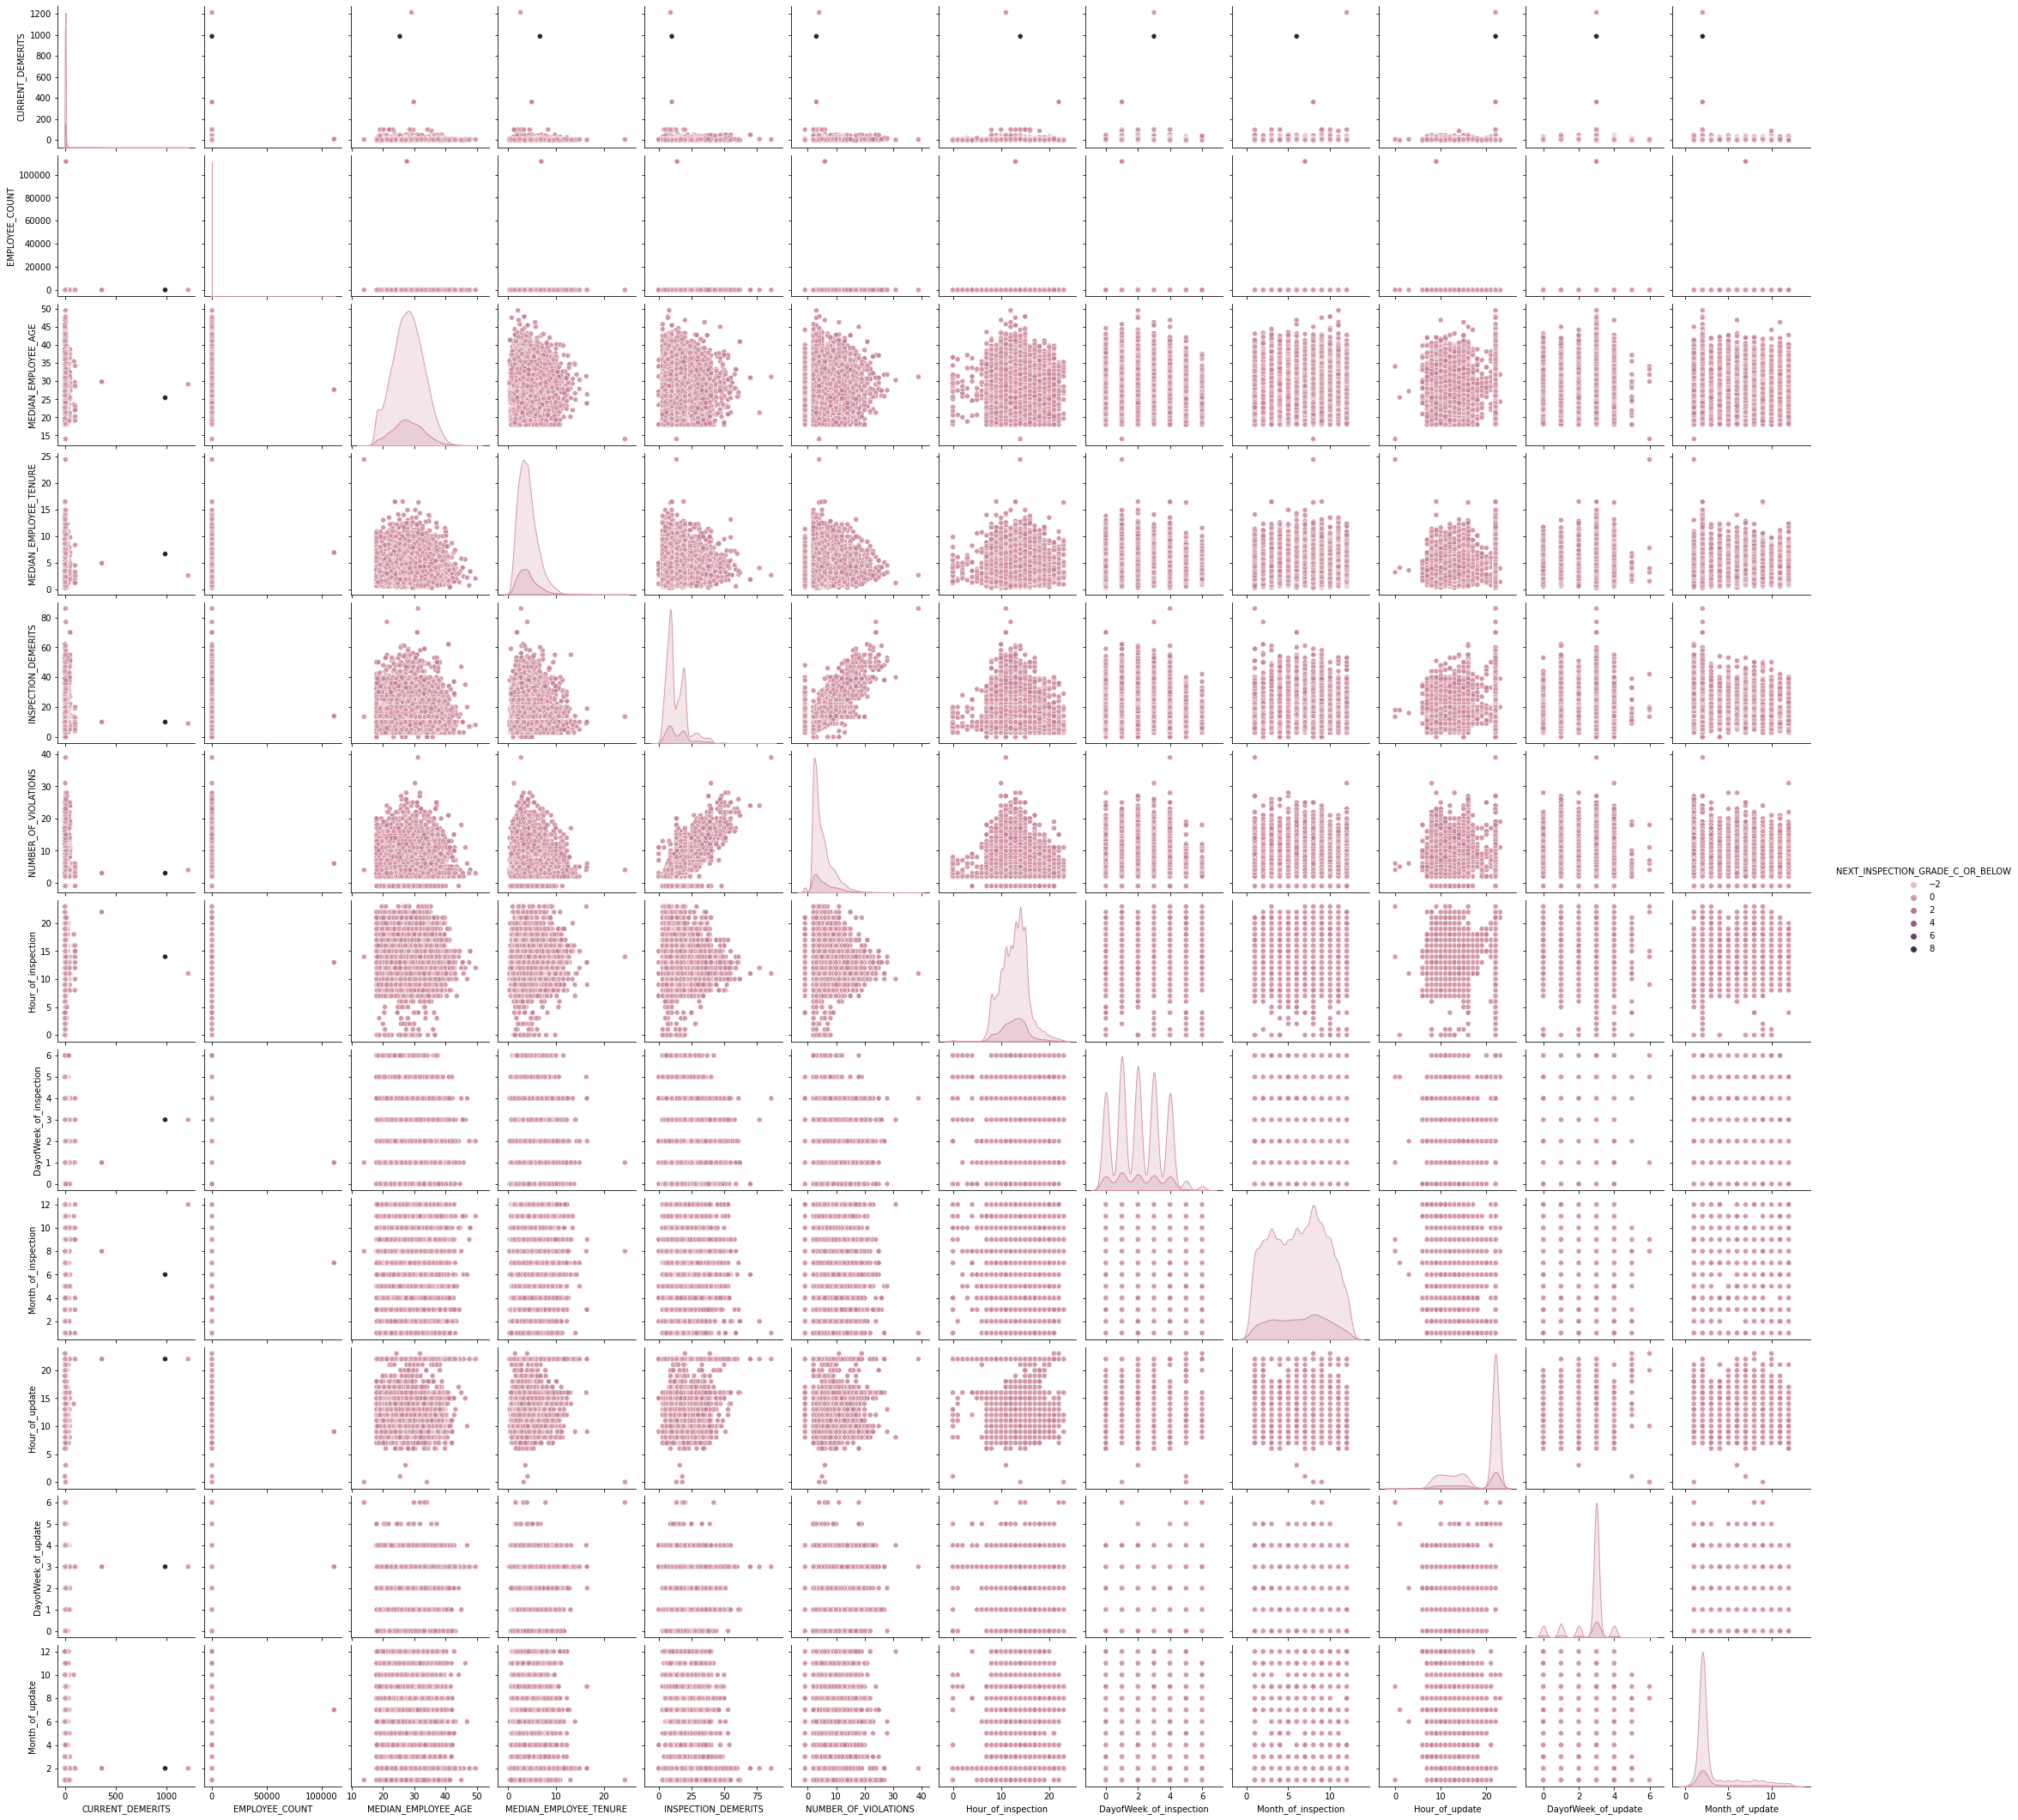

In [32]:
sns.pairplot(data, hue= 'NEXT_INSPECTION_GRADE_C_OR_BELOW')

11. From the scatterplot, we immediately see that there are multiple classes of the output. 
    There should only be two (0 and 1). We will plot box plots to get more insight into the dataset

<AxesSubplot:xlabel='NEXT_INSPECTION_GRADE_C_OR_BELOW'>

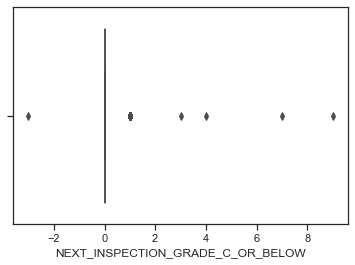

In [33]:
sns.set(style="ticks")
sns.boxplot(data['NEXT_INSPECTION_GRADE_C_OR_BELOW'])

<AxesSubplot:xlabel='EMPLOYEE_COUNT'>

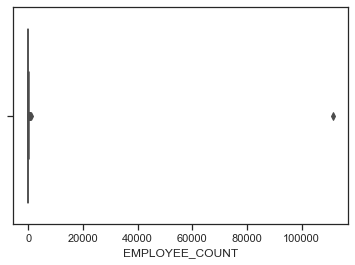

In [34]:
sns.boxplot(data['EMPLOYEE_COUNT'])

<AxesSubplot:xlabel='MEDIAN_EMPLOYEE_AGE'>

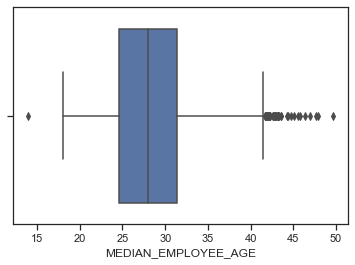

In [35]:
sns.boxplot(data['MEDIAN_EMPLOYEE_AGE'])

<AxesSubplot:xlabel='CURRENT_DEMERITS'>

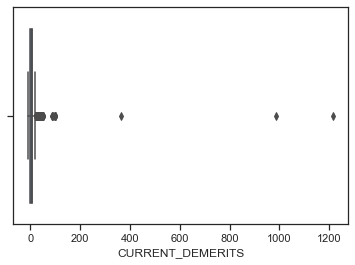

In [36]:
sns.boxplot(data['CURRENT_DEMERITS'])

12. Let us remove the outliers from the output dataset 'NEXT_INSPECTION_GRADE_C_OR_BELOW' as well as inputs 'NUMBER_OF_VIOLATIONS, and 'EMPLOYEE_COUNT' as shown below:

In [37]:
data = data[(data['NEXT_INSPECTION_GRADE_C_OR_BELOW'] <= 1)]
data= data[(data['NEXT_INSPECTION_GRADE_C_OR_BELOW'] >= 0)]
data = data[(data['NUMBER_OF_VIOLATIONS'] >= 0)]
data = data[(data['EMPLOYEE_COUNT'] >= 0)]

<AxesSubplot:xlabel='NEXT_INSPECTION_GRADE_C_OR_BELOW'>

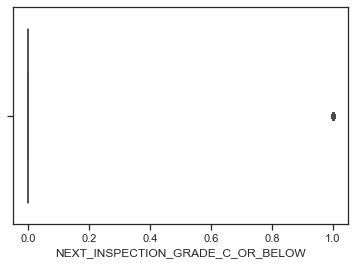

In [38]:
sns.boxplot(data['NEXT_INSPECTION_GRADE_C_OR_BELOW'])

13. From the new boxplot, we see that we have a very imbalanced dataset. The dataset is more skewed to 0 than 1; this means that the data was sampled such that more restaurants will likely have their next inspection grade of at least a C. Let us describe the data to see more.

In [39]:
data.describe()

CURRENT_DEMERITS  EMPLOYEE_COUNT  MEDIAN_EMPLOYEE_AGE  \
count      15461.000000    15461.000000         15461.000000   
mean           5.178431       22.383082            28.014447   
std           11.396405      896.259531             4.890661   
min           -8.000000        3.000000            14.000000   
25%            0.000000        8.000000            24.614266   
50%            5.000000       14.000000            27.990841   
75%            8.000000       21.000000            31.391322   
max         1214.000000   111447.000000            49.614076   

       MEDIAN_EMPLOYEE_TENURE  INSPECTION_DEMERITS  NUMBER_OF_VIOLATIONS  \
count            15461.000000         15461.000000          15461.000000   
mean                 4.031810            13.572000              5.216998   
std                  2.004680             8.422718              3.588224   
min                  0.227197             0.000000              2.000000   
25%                  2.571227             8.000000              3.000000   
50%                  3.751445            10.000000              4.000000   
75%                  5.100699            19.000000              7.000000   
max                 24.399347            86.000000             39.000000   

       NEXT_INSPECTION_GRADE_C_OR_BELOW  Hour_of_inspection  \
count                       15461.00000        15461.000000   
mean                            0.15911           12.725374   
std                             0.36579            2.809381   
min                             0.00000            0.000000   
25%                             0.00000           11.000000   
50%                             0.00000           13.000000   
75%                             0.00000           14.000000   
max                             1.00000           23.000000   

       DayofWeek_of_inspection  Month_of_inspection  Hour_of_update  \
count             15461.000000         15461.000000    15461.000000   
mean                  2.044111             6.270875       18.618136   
std                   1.427686             3.196695        4.949195   
min                   0.000000             1.000000        0.000000   
25%                   1.000000             3.000000       14.000000   
50%                   2.000000             6.000000       22.000000   
75%                   3.000000             9.000000       22.000000   
max                   6.000000            12.000000       23.000000   

       DayofWeek_of_update  Month_of_update  
count         15461.000000     15461.000000  
mean              2.646336         3.354117  
std               0.962632         2.676405  
min               0.000000         1.000000  
25%               3.000000         2.000000  
50%               3.000000         2.000000  
75%               3.000000         3.000000  
max               6.000000        12.000000

Because the data is imbalanced, we have to ask: "Do we want to prioritize having a correct prediction of class 0 (having a grade of at least C on the next inspection) or a correct prediction of class 1.
For the health and safety of  the population, our goal here should be to minimze false positives. We want to be precise when saying that a restaurant has a good rating (inspection score) so that people do not go there with false information and get sick.

14. Now we shall use z-score transformation to remove outliers in the other continuous numeric fields

In [40]:
from scipy import stats

subset_data = data[['CURRENT_DEMERITS','EMPLOYEE_COUNT']]

subset_data = subset_data[(np.abs(stats.zscore(subset_data)) < 3).all(axis=1)]

data['CURRENT_DEMERITS'] = subset_data['CURRENT_DEMERITS']
data['EMPLOYEE_COUNT'] = subset_data['EMPLOYEE_COUNT']

In [41]:
data.describe()

CURRENT_DEMERITS  EMPLOYEE_COUNT  MEDIAN_EMPLOYEE_AGE  \
count      15420.000000    15420.000000         15461.000000   
mean           4.939865       15.178717            28.014447   
std            4.263540       12.669652             4.890661   
min           -8.000000        3.000000            14.000000   
25%            0.000000        8.000000            24.614266   
50%            5.000000       14.000000            27.990841   
75%            8.000000       21.000000            31.391322   
max           39.000000      902.000000            49.614076   

       MEDIAN_EMPLOYEE_TENURE  INSPECTION_DEMERITS  NUMBER_OF_VIOLATIONS  \
count            15461.000000         15461.000000          15461.000000   
mean                 4.031810            13.572000              5.216998   
std                  2.004680             8.422718              3.588224   
min                  0.227197             0.000000              2.000000   
25%                  2.571227             8.000000              3.000000   
50%                  3.751445            10.000000              4.000000   
75%                  5.100699            19.000000              7.000000   
max                 24.399347            86.000000             39.000000   

       NEXT_INSPECTION_GRADE_C_OR_BELOW  Hour_of_inspection  \
count                       15461.00000        15461.000000   
mean                            0.15911           12.725374   
std                             0.36579            2.809381   
min                             0.00000            0.000000   
25%                             0.00000           11.000000   
50%                             0.00000           13.000000   
75%                             0.00000           14.000000   
max                             1.00000           23.000000   

       DayofWeek_of_inspection  Month_of_inspection  Hour_of_update  \
count             15461.000000         15461.000000    15461.000000   
mean                  2.044111             6.270875       18.618136   
std                   1.427686             3.196695        4.949195   
min                   0.000000             1.000000        0.000000   
25%                   1.000000             3.000000       14.000000   
50%                   2.000000             6.000000       22.000000   
75%                   3.000000             9.000000       22.000000   
max                   6.000000            12.000000       23.000000   

       DayofWeek_of_update  Month_of_update  
count         15461.000000     15461.000000  
mean              2.646336         3.354117  
std               0.962632         2.676405  
min               0.000000         1.000000  
25%               3.000000         2.000000  
50%               3.000000         2.000000  
75%               3.000000         3.000000  
max               6.000000        12.000000

<AxesSubplot:xlabel='CURRENT_DEMERITS'>

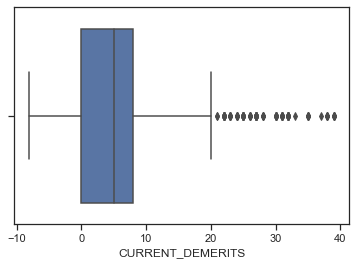

In [42]:
sns.boxplot(data['CURRENT_DEMERITS'])

<AxesSubplot:xlabel='EMPLOYEE_COUNT'>

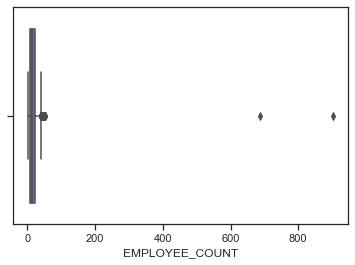

In [43]:
sns.boxplot(data['EMPLOYEE_COUNT'])

15. For Employee count, we still have a few outliers which we will remove as follows:

In [44]:
data = data[(data['EMPLOYEE_COUNT'] < 500)] #Remove all datapoints with more 500 or more employees

<AxesSubplot:xlabel='EMPLOYEE_COUNT'>

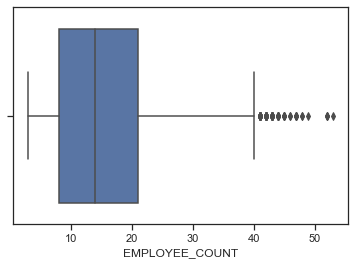

In [45]:
sns.boxplot(data['EMPLOYEE_COUNT'])

In [46]:
data.describe()

CURRENT_DEMERITS  EMPLOYEE_COUNT  MEDIAN_EMPLOYEE_AGE  \
count      15418.000000    15418.000000         15418.000000   
mean           4.939209       15.077625            28.014039   
std            4.263427        8.957843             4.890123   
min           -8.000000        3.000000            14.000000   
25%            0.000000        8.000000            24.613448   
50%            5.000000       14.000000            27.990231   
75%            8.000000       21.000000            31.395647   
max           39.000000       53.000000            49.614076   

       MEDIAN_EMPLOYEE_TENURE  INSPECTION_DEMERITS  NUMBER_OF_VIOLATIONS  \
count            15418.000000         15418.000000          15418.000000   
mean                 4.032433            13.545085              5.206706   
std                  2.004628             8.371198              3.570510   
min                  0.227197             0.000000              2.000000   
25%                  2.572776             8.000000              3.000000   
50%                  3.751968            10.000000              4.000000   
75%                  5.101419            19.000000              7.000000   
max                 24.399347            86.000000             39.000000   

       NEXT_INSPECTION_GRADE_C_OR_BELOW  Hour_of_inspection  \
count                      15418.000000        15418.000000   
mean                           0.158646           12.726489   
std                            0.365357            2.809093   
min                            0.000000            0.000000   
25%                            0.000000           11.000000   
50%                            0.000000           13.000000   
75%                            0.000000           14.000000   
max                            1.000000           23.000000   

       DayofWeek_of_inspection  Month_of_inspection  Hour_of_update  \
count             15418.000000         15418.000000     15418.00000   
mean                  2.044299             6.270658        18.61733   
std                   1.428015             3.196689         4.95027   
min                   0.000000             1.000000         0.00000   
25%                   1.000000             3.000000        14.00000   
50%                   2.000000             6.000000        22.00000   
75%                   3.000000             9.000000        22.00000   
max                   6.000000            12.000000        23.00000   

       DayofWeek_of_update  Month_of_update  
count         15418.000000     15418.000000  
mean              2.646258         3.355429  
std               0.962981         2.677569  
min               0.000000         1.000000  
25%               3.000000         2.000000  
50%               3.000000         2.000000  
75%               3.000000         3.000000  
max               6.000000        12.000000

In [47]:
data = data[(data['CURRENT_DEMERITS'] >= 0)]

In [48]:
data.describe()

CURRENT_DEMERITS  EMPLOYEE_COUNT  MEDIAN_EMPLOYEE_AGE  \
count      15417.000000    15417.000000         15417.000000   
mean           4.940048       15.078408            28.013991   
std            4.262292        8.957605             4.890278   
min            0.000000        3.000000            14.000000   
25%            0.000000        8.000000            24.613175   
50%            5.000000       14.000000            27.989622   
75%            8.000000       21.000000            31.397089   
max           39.000000       53.000000            49.614076   

       MEDIAN_EMPLOYEE_TENURE  INSPECTION_DEMERITS  NUMBER_OF_VIOLATIONS  \
count            15417.000000         15417.000000          15417.000000   
mean                 4.032362            13.545379              5.206720   
std                  2.004673             8.371389              3.570625   
min                  0.227197             0.000000              2.000000   
25%                  2.572733             8.000000              3.000000   
50%                  3.751955            10.000000              4.000000   
75%                  5.100699            19.000000              7.000000   
max                 24.399347            86.000000             39.000000   

       NEXT_INSPECTION_GRADE_C_OR_BELOW  Hour_of_inspection  \
count                      15417.000000        15417.000000   
mean                           0.158591           12.726601   
std                            0.365306            2.809150   
min                            0.000000            0.000000   
25%                            0.000000           11.000000   
50%                            0.000000           13.000000   
75%                            0.000000           14.000000   
max                            1.000000           23.000000   

       DayofWeek_of_inspection  Month_of_inspection  Hour_of_update  \
count             15417.000000         15417.000000    15417.000000   
mean                  2.044431             6.271000       18.617630   
std                   1.427966             3.196511        4.950291   
min                   0.000000             1.000000        0.000000   
25%                   1.000000             3.000000       14.000000   
50%                   2.000000             6.000000       22.000000   
75%                   3.000000             9.000000       22.000000   
max                   6.000000            12.000000       23.000000   

       DayofWeek_of_update  Month_of_update  
count         15417.000000     15417.000000  
mean              2.646235         3.355582  
std               0.963008         2.677588  
min               0.000000         1.000000  
25%               3.000000         2.000000  
50%               3.000000         2.000000  
75%               3.000000         3.000000  
max               6.000000        12.000000

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15417 entries, 0 to 15672
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   RESTAURANT_CATEGORY               15417 non-null  object 
 1   CITY                              15417 non-null  object 
 2   STATE                             15417 non-null  object 
 3   CURRENT_DEMERITS                  15417 non-null  float64
 4   EMPLOYEE_COUNT                    15417 non-null  float64
 5   MEDIAN_EMPLOYEE_AGE               15417 non-null  float64
 6   MEDIAN_EMPLOYEE_TENURE            15417 non-null  float64
 7   INSPECTION_TYPE                   15417 non-null  object 
 8   INSPECTION_DEMERITS               15417 non-null  float64
 9   FIRST_VIOLATION_TYPE              15417 non-null  object 
 10  SECOND_VIOLATION_TYPE             15417 non-null  object 
 11  THIRD_VIOLATION_TYPE              15417 non-null  object 
 12  NUMB

We will now visualize the data to get some insight as follows:

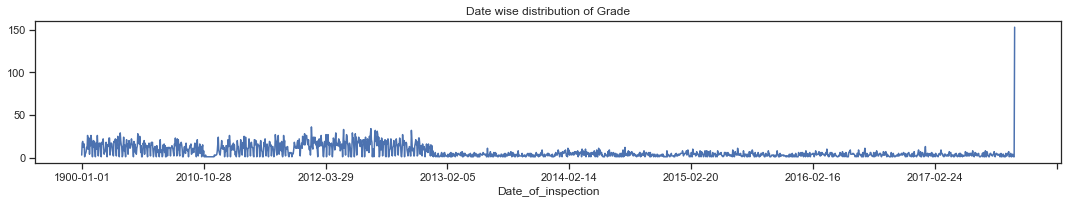

In [50]:
#Lets see how the likelihood of a restaurant scoring higher than a C varies with the date of inspection
plt.figure(figsize=(15,3))
data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==0].groupby('Date_of_inspection').count()['NEXT_INSPECTION_GRADE_C_OR_BELOW'].plot()
plt.title('Date wise distribution of Grade')
plt.tight_layout()

From the chart above, we see that more restaurants are likely to have their next inspection grades above C if the date of their last inspection was before 2013

<AxesSubplot:xlabel='NUMBER_OF_VIOLATIONS'>

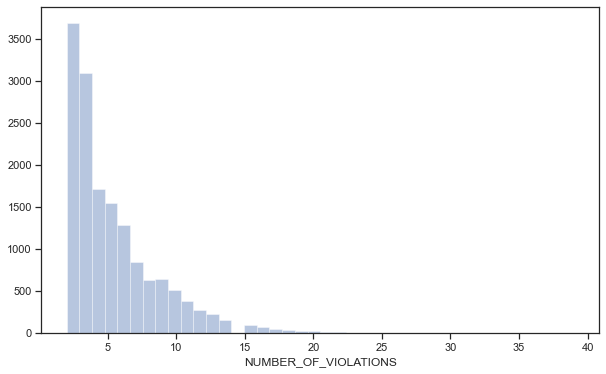

In [51]:
#Let us see the distribution of the number of violations
plt.figure(figsize=(10,6))
sns.distplot(data['NUMBER_OF_VIOLATIONS'],kde=False,bins=40)

We see that the data for number of violations is right-skewed. There are more restaurants with fewer violations

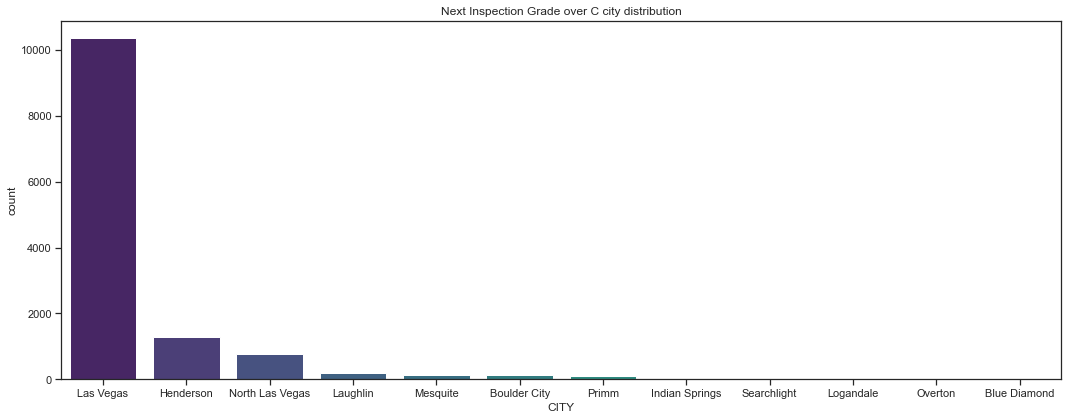

In [52]:
plt.figure(figsize=(15,6))
sns.countplot(x='CITY',data=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==0],order=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==0]['CITY'].value_counts().index[:12],
              palette='viridis')
plt.title('Next Inspection Grade over C city distribution')
plt.tight_layout()

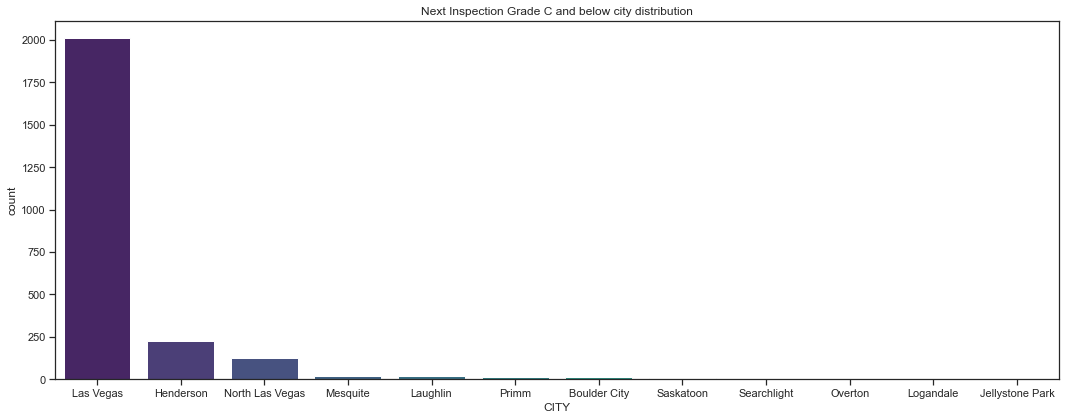

In [53]:
plt.figure(figsize=(15,6))
sns.countplot(x='CITY',data=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==1],order=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==1]['CITY'].value_counts().index[:12],
              palette='viridis')
plt.title('Next Inspection Grade C and below city distribution')
plt.tight_layout()

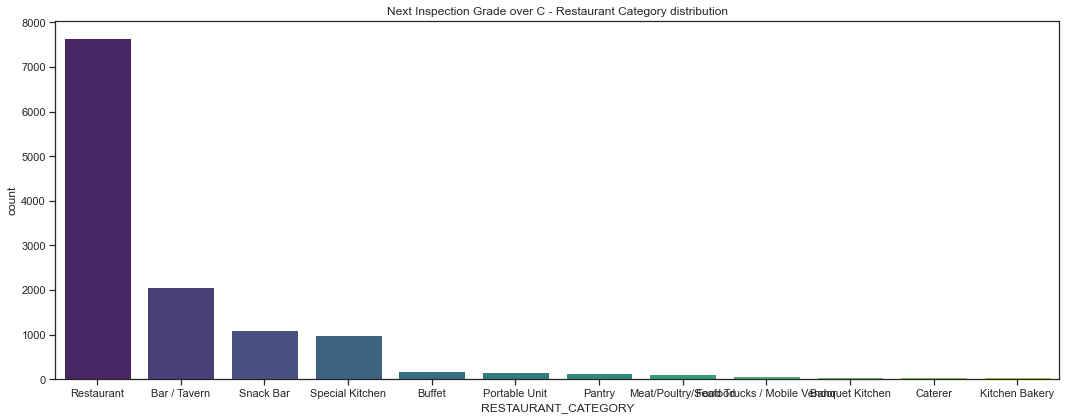

In [54]:
plt.figure(figsize=(15,6))
sns.countplot(x='RESTAURANT_CATEGORY',data=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==0],order=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==0]['RESTAURANT_CATEGORY'].value_counts().index[:12],
              palette='viridis')
plt.title('Next Inspection Grade over C - Restaurant Category distribution')
plt.tight_layout()

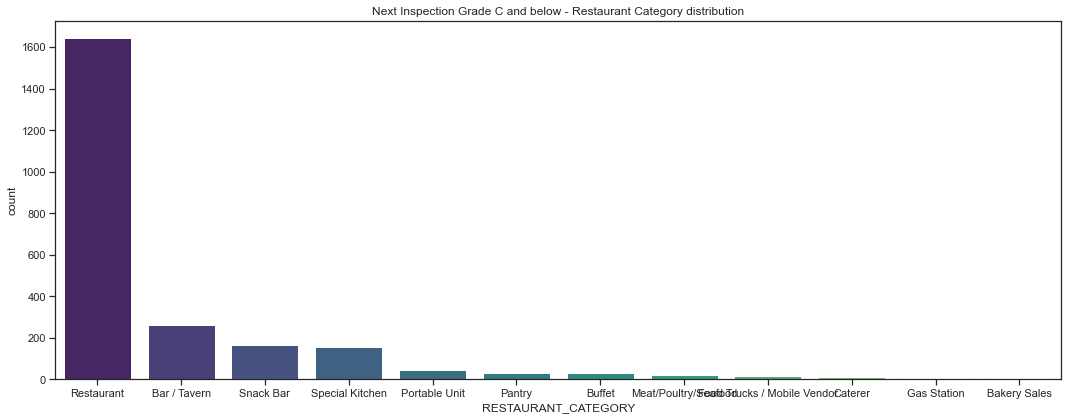

In [55]:
plt.figure(figsize=(15,6))
sns.countplot(x='RESTAURANT_CATEGORY',data=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==1],order=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==1]['RESTAURANT_CATEGORY'].value_counts().index[:12],
              palette='viridis')
plt.title('Next Inspection Grade C and below - Restaurant Category distribution')
plt.tight_layout()

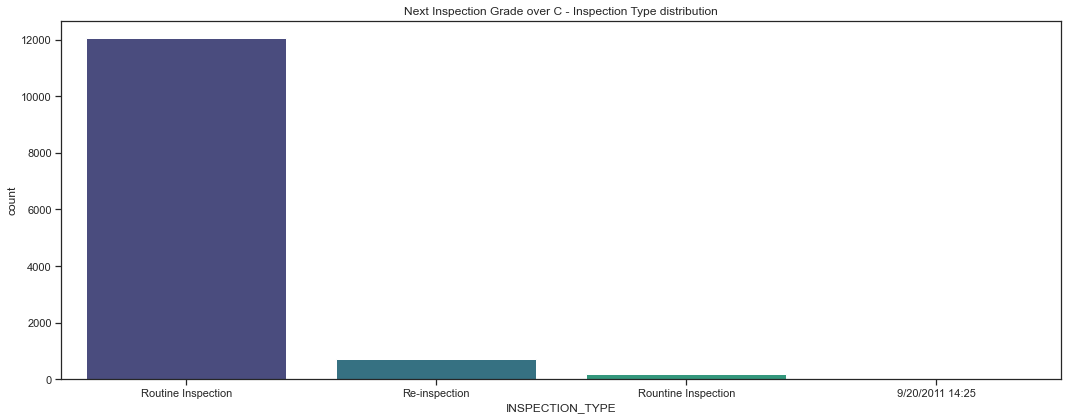

In [56]:
plt.figure(figsize=(15,6))
sns.countplot(x='INSPECTION_TYPE',data=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==0],order=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==0]['INSPECTION_TYPE'].value_counts().index[:12],
              palette='viridis')
plt.title('Next Inspection Grade over C - Inspection Type distribution')
plt.tight_layout()

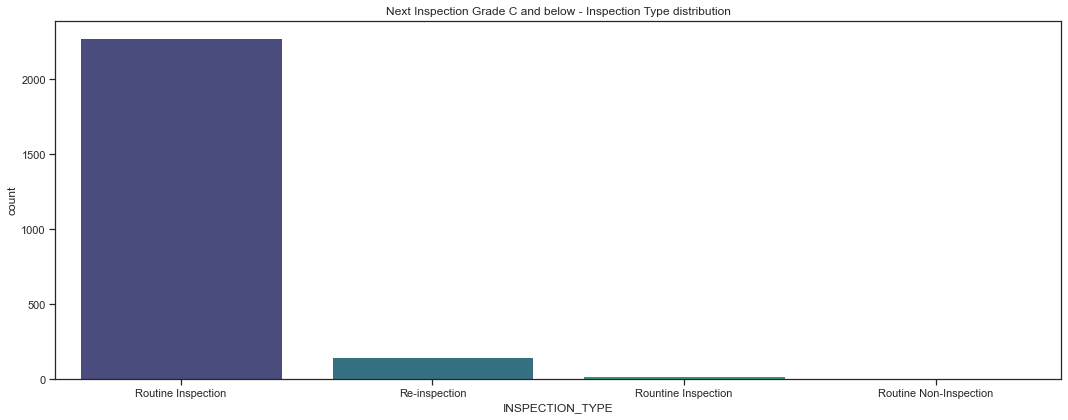

In [57]:
plt.figure(figsize=(15,6))
sns.countplot(x='INSPECTION_TYPE',data=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==1],order=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==1]['INSPECTION_TYPE'].value_counts().index[:12],
              palette='viridis')
plt.title('Next Inspection Grade C and below - Inspection Type distribution')
plt.tight_layout()

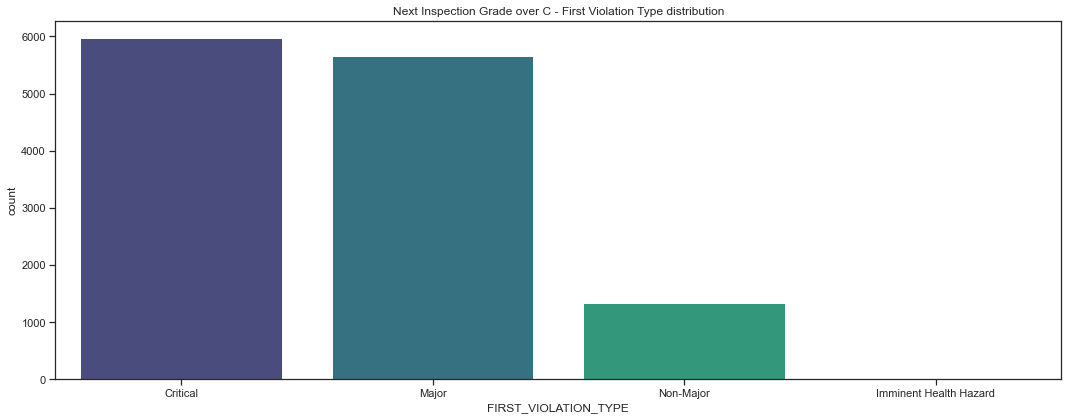

In [58]:
plt.figure(figsize=(15,6))
sns.countplot(x='FIRST_VIOLATION_TYPE',data=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==0],order=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==0]['FIRST_VIOLATION_TYPE'].value_counts().index[:12],
              palette='viridis')
plt.title('Next Inspection Grade over C - First Violation Type distribution')
plt.tight_layout()

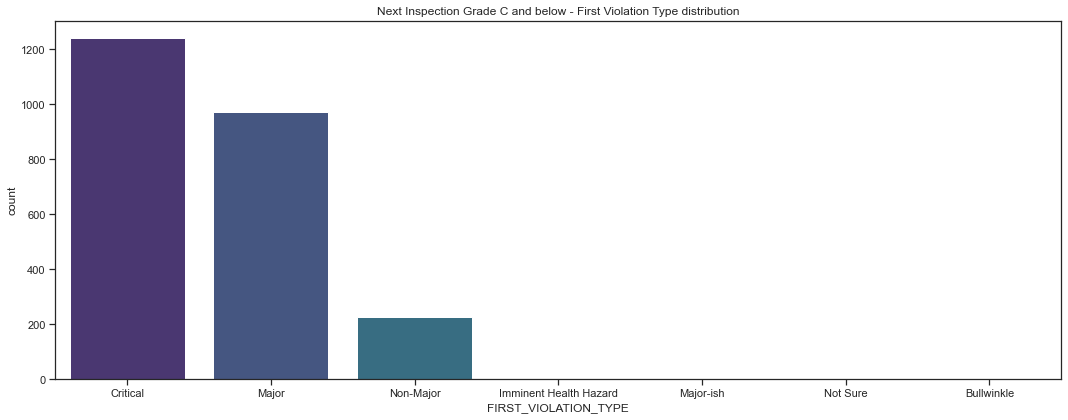

In [59]:
plt.figure(figsize=(15,6))
sns.countplot(x='FIRST_VIOLATION_TYPE',data=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==1],order=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==1]['FIRST_VIOLATION_TYPE'].value_counts().index[:12],
              palette='viridis')
plt.title('Next Inspection Grade C and below - First Violation Type distribution')
plt.tight_layout()

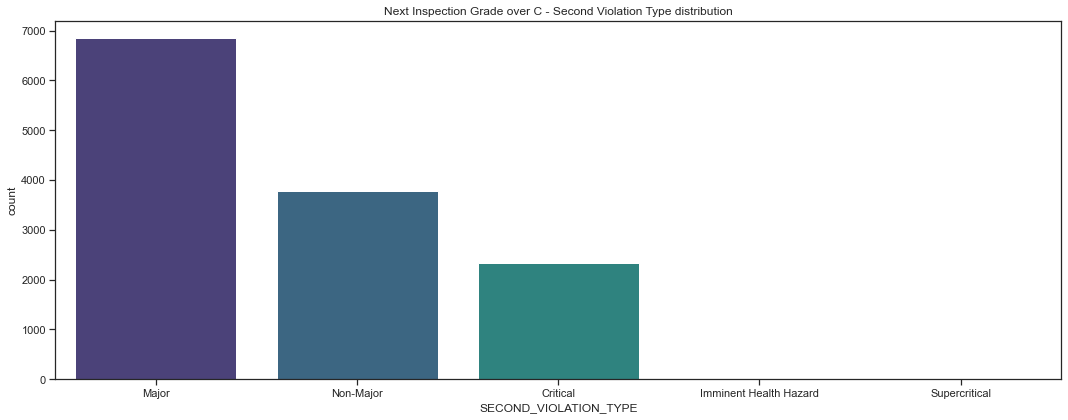

In [60]:
plt.figure(figsize=(15,6))
sns.countplot(x='SECOND_VIOLATION_TYPE',data=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==0],order=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==0]['SECOND_VIOLATION_TYPE'].value_counts().index[:12],
              palette='viridis')
plt.title('Next Inspection Grade over C - Second Violation Type distribution')
plt.tight_layout()

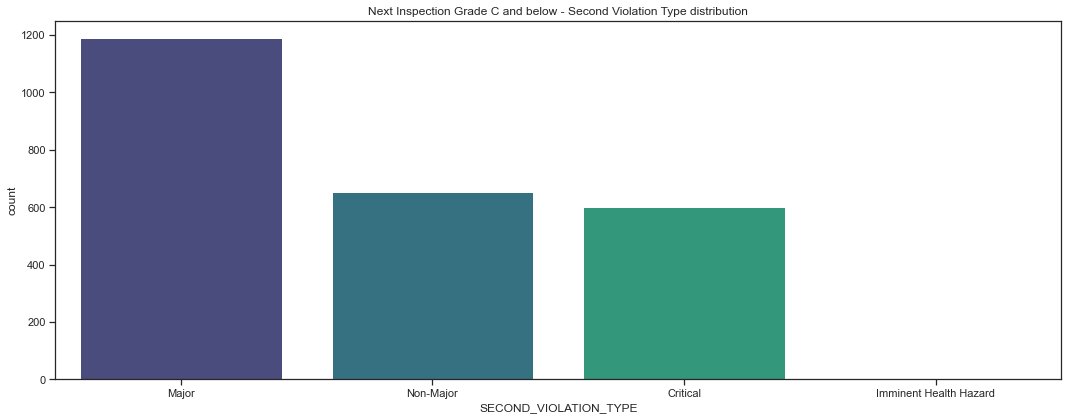

In [61]:
plt.figure(figsize=(15,6))
sns.countplot(x='SECOND_VIOLATION_TYPE',data=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==1],order=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==1]['SECOND_VIOLATION_TYPE'].value_counts().index[:12],
              palette='viridis')
plt.title('Next Inspection Grade C and below - Second Violation Type distribution')
plt.tight_layout()

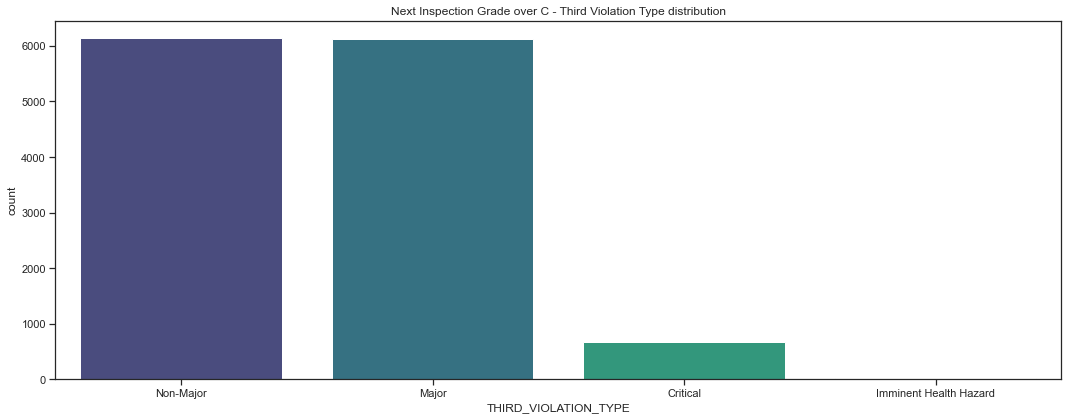

In [62]:
plt.figure(figsize=(15,6))
sns.countplot(x='THIRD_VIOLATION_TYPE',data=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==0],order=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==0]['THIRD_VIOLATION_TYPE'].value_counts().index[:12],
              palette='viridis')
plt.title('Next Inspection Grade over C - Third Violation Type distribution')
plt.tight_layout()

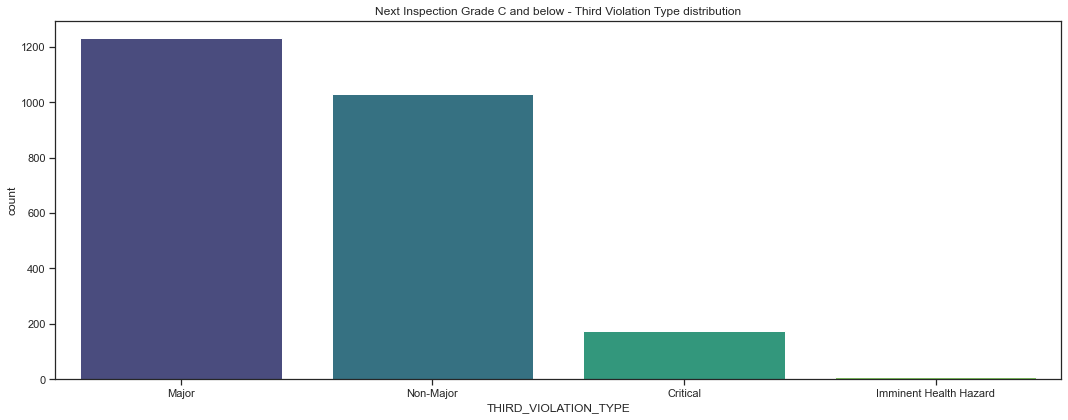

In [63]:
plt.figure(figsize=(15,6))
sns.countplot(x='THIRD_VIOLATION_TYPE',data=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==1],order=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==1]['THIRD_VIOLATION_TYPE'].value_counts().index[:12],
              palette='viridis')
plt.title('Next Inspection Grade C and below - Third Violation Type distribution')
plt.tight_layout()

Text(0.5, 1.0, 'Next Inspection Grade Distribution based on previous hour of inspection')

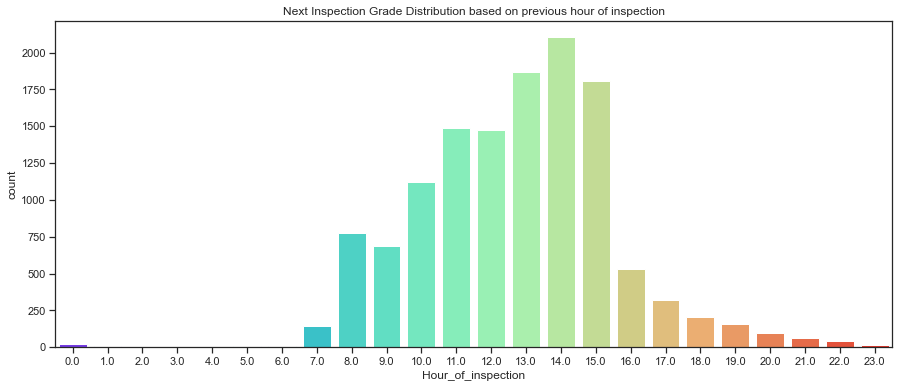

In [64]:
plt.figure(figsize=(15,6))
sns.countplot(x='Hour_of_inspection',data=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==0],palette='rainbow')
plt.title('Next Inspection Grade Distribution based on previous hour of inspection')

Text(0.5, 1.0, 'Next Inspection Grade of above C Distribution based on previous Month of inspection')

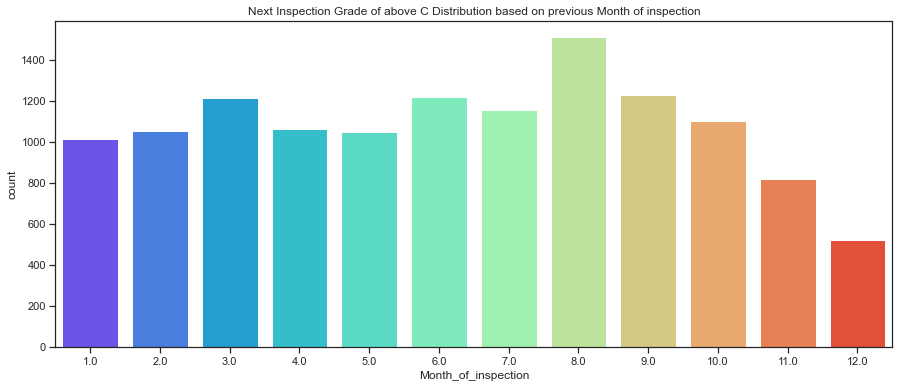

In [65]:
plt.figure(figsize=(15,6))
sns.countplot(x='Month_of_inspection',data=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==0],palette='rainbow')
plt.title('Next Inspection Grade of above C Distribution based on previous Month of inspection')

Text(0.5, 1.0, 'Next Inspection Grade of above C Distribution based on previous Weekday of inspection')

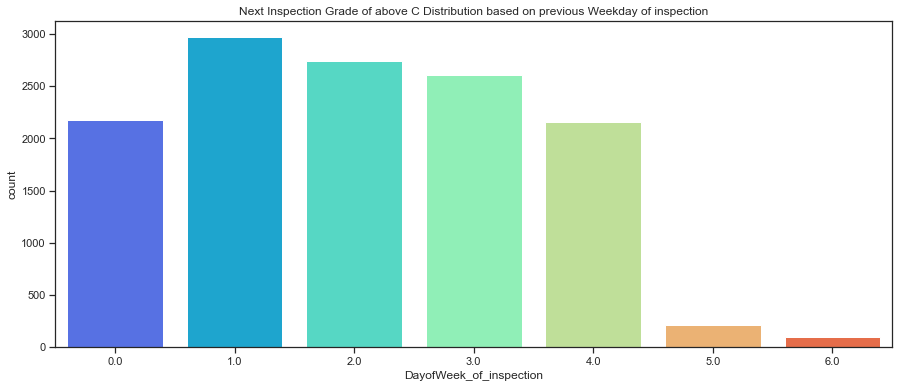

In [66]:
plt.figure(figsize=(15,6))
sns.countplot(x='DayofWeek_of_inspection',data=data[data['NEXT_INSPECTION_GRADE_C_OR_BELOW']==0],palette='rainbow')
plt.title('Next Inspection Grade of above C Distribution based on previous Weekday of inspection')

<AxesSubplot:xlabel='NEXT_INSPECTION_GRADE_C_OR_BELOW', ylabel='EMPLOYEE_COUNT'>

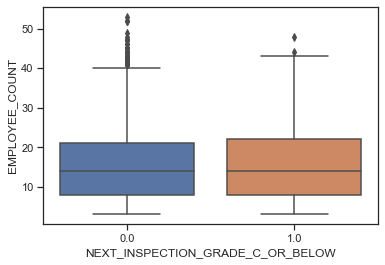

In [67]:
sns.boxplot(x=data['NEXT_INSPECTION_GRADE_C_OR_BELOW'], y=data['EMPLOYEE_COUNT'])

<AxesSubplot:xlabel='NEXT_INSPECTION_GRADE_C_OR_BELOW', ylabel='CURRENT_DEMERITS'>

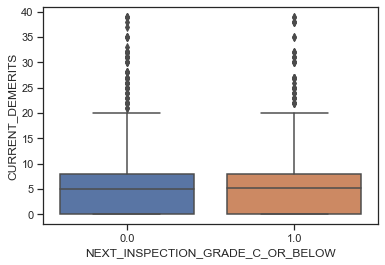

In [68]:
sns.boxplot(x=data['NEXT_INSPECTION_GRADE_C_OR_BELOW'], y=data['CURRENT_DEMERITS'])

<AxesSubplot:xlabel='NEXT_INSPECTION_GRADE_C_OR_BELOW', ylabel='MEDIAN_EMPLOYEE_AGE'>

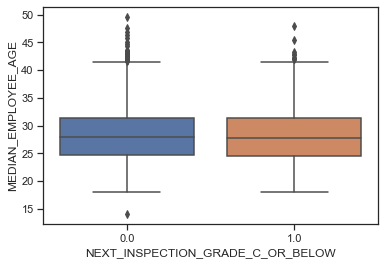

In [69]:
sns.boxplot(x=data['NEXT_INSPECTION_GRADE_C_OR_BELOW'], y=data['MEDIAN_EMPLOYEE_AGE'])

<AxesSubplot:xlabel='NEXT_INSPECTION_GRADE_C_OR_BELOW', ylabel='MEDIAN_EMPLOYEE_TENURE'>

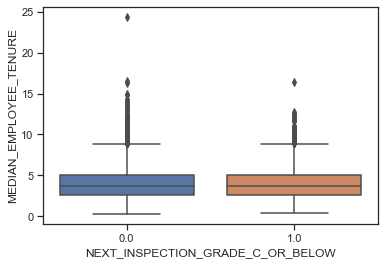

In [70]:
sns.boxplot(x=data['NEXT_INSPECTION_GRADE_C_OR_BELOW'], y=data['MEDIAN_EMPLOYEE_TENURE'])

<AxesSubplot:xlabel='NEXT_INSPECTION_GRADE_C_OR_BELOW', ylabel='INSPECTION_DEMERITS'>

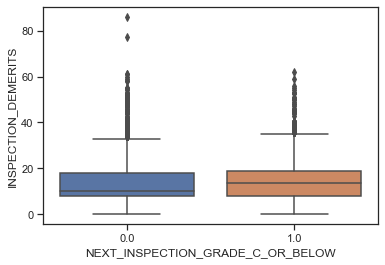

In [71]:
sns.boxplot(x=data['NEXT_INSPECTION_GRADE_C_OR_BELOW'], y=data['INSPECTION_DEMERITS'])

<AxesSubplot:xlabel='NEXT_INSPECTION_GRADE_C_OR_BELOW', ylabel='NUMBER_OF_VIOLATIONS'>

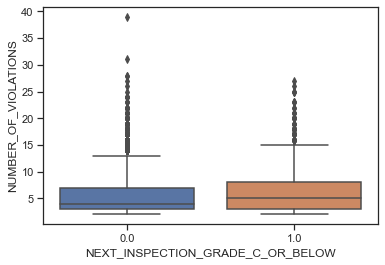

In [72]:
sns.boxplot(x=data['NEXT_INSPECTION_GRADE_C_OR_BELOW'], y=data['NUMBER_OF_VIOLATIONS'])

In [73]:
data.drop('Date_of_inspection', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
data.drop('Date_of_update', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification

Just one last Check for null values

In [74]:
data.isna().sum().sum()

0

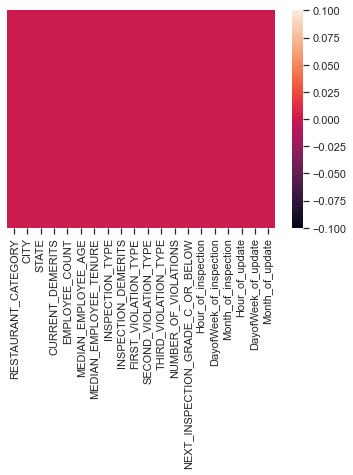

In [75]:
sns.heatmap(data.isnull(), yticklabels=False)
plt.show()

Let us see what the new pairplot looks like:

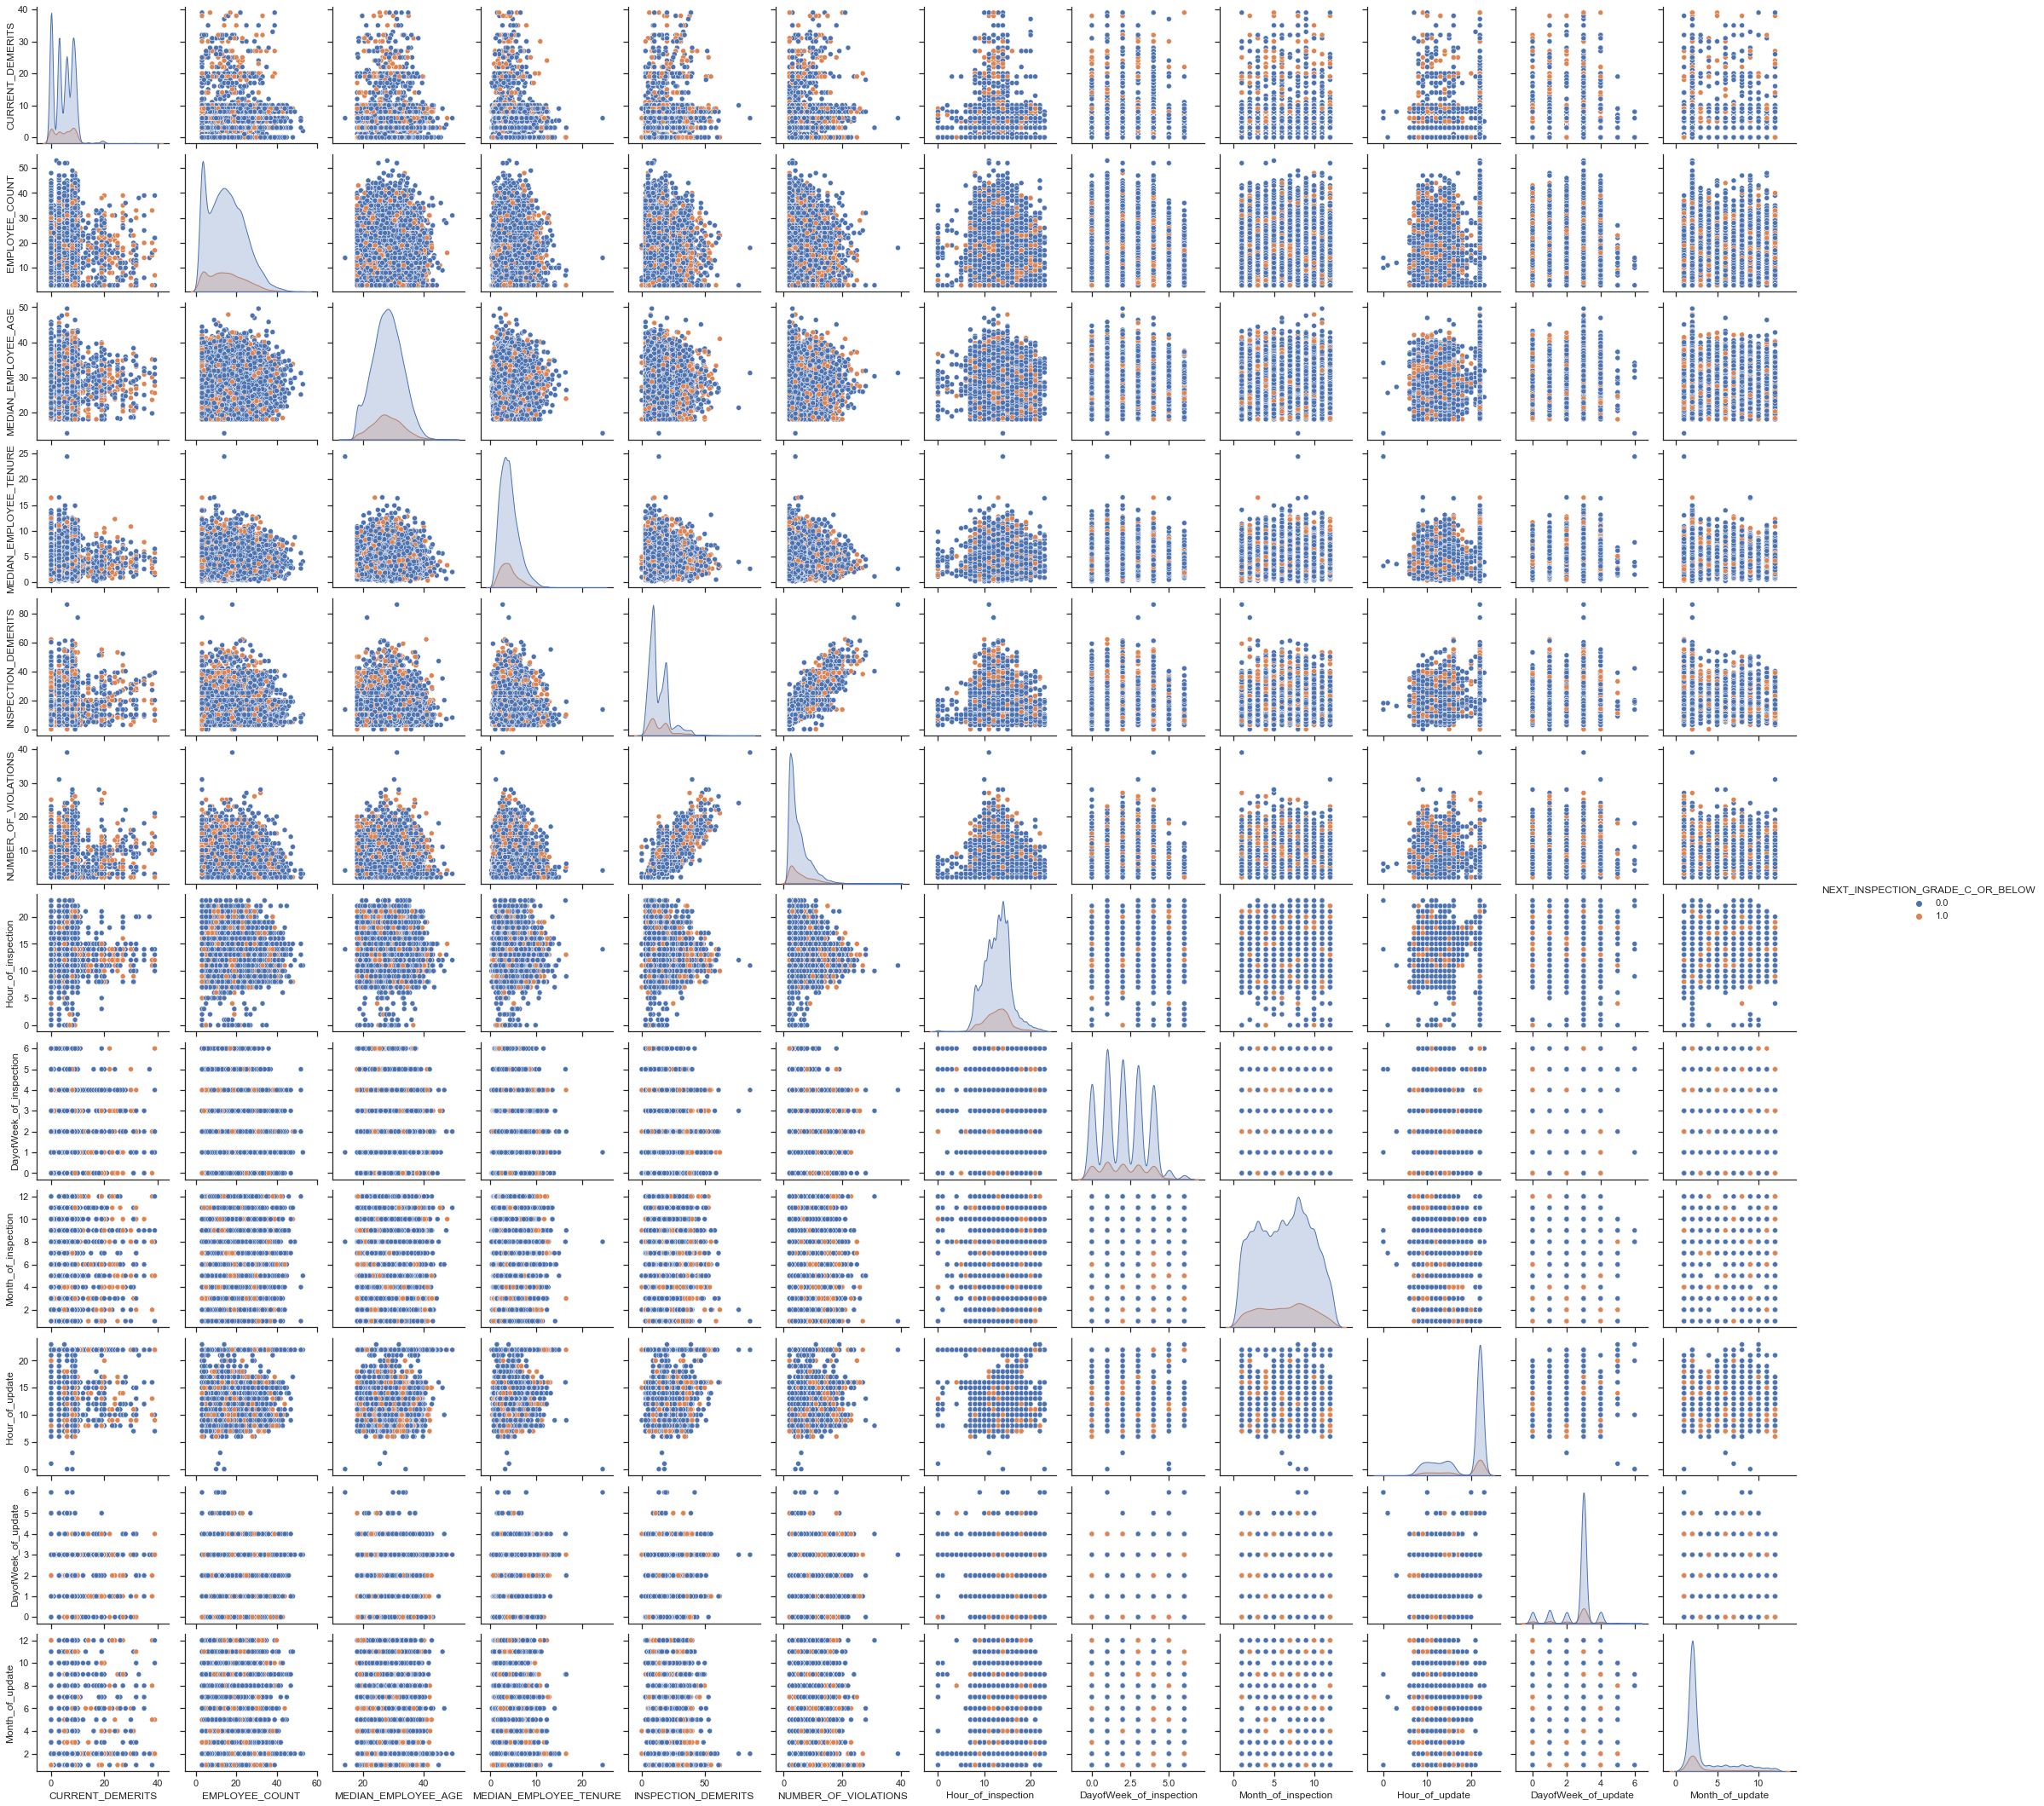

In [76]:
sns.pairplot(data, hue = 'NEXT_INSPECTION_GRADE_C_OR_BELOW')

Some observations:
- The most visible direct relationship in the data is between the Inspection demerits and the Number of Violations.


- Restaurants with fewer number of violations and inspection demerits are more likely to have grades higher than C.


- Restaurants who had inspections carried out at the middle of the year are more likely to score a grade of C or higher. Las Vegas/Nevada is a top tourist destination in the summer. Restaurants do what they can to ensure quality to attract customers.


- Restaurants who had inspections carried out around midday are more likely to score a grade of C or higher. We may attribute this to restaurant peak periods translating to higher attention to detail.


- Las Vegas restaurants are on average more likely to score grades of C or higher. This is maybe due to the urban nature of the city.


- Employee Tenure, Employee age and Current demerits have the same median across both classes and it could be assumed that they have little effect on the likelihood. We shall keep these values for the prediction because they could have an impact in combination with other variables.


- Routine inspections were the most common type of inspections carried out.


- Restaurants were the most common places inspected. Very little sample size for other restaurant types.


- Las Vegas is the city where the most inspections were carried out; probably because of its population.


- For restaurants that scored over a C, they saw a steady decline in the severity of violations from Critical, to Major, to Non-major as at their third violation


- Restaurants that scored C and below were however unable to bring down the severity from Major as at their third violation

In [77]:
data.columns

Index(['RESTAURANT_CATEGORY', 'CITY', 'STATE', 'CURRENT_DEMERITS',
       'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE',
       'INSPECTION_TYPE', 'INSPECTION_DEMERITS', 'FIRST_VIOLATION_TYPE',
       'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE', 'NUMBER_OF_VIOLATIONS',
       'NEXT_INSPECTION_GRADE_C_OR_BELOW', 'Hour_of_inspection',
       'DayofWeek_of_inspection', 'Month_of_inspection', 'Hour_of_update',
       'DayofWeek_of_update', 'Month_of_update'],
      dtype='object')

In [78]:
Y= data['NEXT_INSPECTION_GRADE_C_OR_BELOW']
data2 = data.copy() ##to merge with test data for scaling and one-hot encoding
data2.drop('NEXT_INSPECTION_GRADE_C_OR_BELOW', inplace = True, axis = 1)
X= data2
X= np.array(X)
Y= np.array(Y)

### Merge Train_set and Test_set for One-hot encoding and Scaling

#### This is to ensure functionality of one hot encoder on the test dataset. Without this, there would be a mismatch when trying to apply one-hot encoding on the test dataset in isolation which would prevent the model from running.

Read in the test data and do the data preparation

In [79]:
test_data = pd.read_csv("TEST_SET_2021.csv")
test_data.head()

RESTAURANT_SERIAL_NUMBER RESTAURANT_PERMIT_NUMBER  \
0                DA1050454                PR0022396   
1                DA0986444                PR0014531   
2                DA1284914                PR0014520   
3                DA1281903                PR0014203   
4                DA1004708                PR0017538   

                     RESTAURANT_NAME   RESTAURANT_LOCATION  \
0               TE PUB EXHIB KITCHEN     TE PUB @ CRYSTALS   
1           Plaza Hotel Showroom Bar  Plaza Hotel & Casino   
2  Plaza Hotel Race & Sportsbook Bar  Plaza Hotel & Casino   
3                Prommares Thai Food   Prommares Thai Food   
4                    ROCCOS NY PIZZA       ROCCOS NY PIZZA   

  RESTAURANT_CATEGORY                  ADDRESS       CITY   STATE         ZIP  \
0     Special Kitchen         3720 S LAS VEGAS  Las Vegas  Nevada       89158   
1        Bar / Tavern              1 S Main St  Las Vegas  Nevada  89101-6370   
2        Bar / Tavern              1 S Main St    Overton  Nevada  89101-6370   
3          Restaurant        6362 W Sahara Ave  Las Vegas  Nevada  89146-3050   
4          Restaurant  1910 VILLAGE CENTER Cir  Las Vegas  Nevada       89134   

   CURRENT_DEMERITS CURRENT_GRADE  INSPECTION_TIME     INSPECTION_TYPE  \
0                 6             A  2/26/2013 12:00  Routine Inspection   
1                 0             A    6/8/2012 9:20  Routine Inspection   
2                 8             A  9/25/2014 16:25  Routine Inspection   
3                 0             A  9/15/2014 14:50       Re-inspection   
4                 9             A  8/16/2012 14:10  Routine Inspection   

   INSPECTION_DEMERITS                                  VIOLATIONS_RAW  \
0                   21                          20,921,321,729,082,900   
1                    8                                 214,222,227,230   
2                   15                      21,121,221,321,529,300,000   
3                   33  20,220,620,921,121,200,000,000,000,000,000,000   
4                   10                         213,214,226,228,229,000   

    RECORD_UPDATED               LAT_LONG_RAW  FIRST_VIOLATION  \
0    3/4/2013 8:45  (36.1077865, 115.1744209)            209.0   
1  2/21/2013 22:26  (36.1720776, 115.1468298)            214.0   
2   9/30/2014 9:12  (36.1720776, 115.1468298)            211.0   
3   1/6/2015 16:35    (36.144283, 115.232894)            202.0   
4  9/15/2016 14:04   (36.193162, 115.3041037)            213.0   

   SECOND_VIOLATION  THIRD_VIOLATION FIRST_VIOLATION_TYPE  \
0               213              217             Critical   
1               222              227                Major   
2               212              213                Major   
3               206              209                    1   
4               214              226                Major   

  SECOND_VIOLATION_TYPE THIRD_VIOLATION_TYPE  NUMBER_OF_VIOLATIONS  \
0                 Major                Major                     5   
1                 Major            Non-Major                     4   
2                 Major                Major                     6   
3              Critical             Critical                    11   
4                 Major            Non-Major                     6   

   EMPLOYEE_COUNT  MEDIAN_EMPLOYEE_AGE  MEDIAN_EMPLOYEE_TENURE  
0        3.000000            31.141933                3.542119  
1       18.598406            26.839893                4.885881  
2        5.730357            31.202256                1.883055  
3       15.075238            36.656000                6.761476  
4       14.218813            21.001225                6.601620

In [80]:
predicted_df = pd.DataFrame(test_data['RESTAURANT_SERIAL_NUMBER'].values, columns=['RESTAURANT_SERIAL_NUMBER'])

In [81]:
test_data.isnull().sum()

RESTAURANT_SERIAL_NUMBER    0
RESTAURANT_PERMIT_NUMBER    0
RESTAURANT_NAME             0
RESTAURANT_LOCATION         1
RESTAURANT_CATEGORY         0
ADDRESS                     2
CITY                        3
STATE                       0
ZIP                         2
CURRENT_DEMERITS            0
CURRENT_GRADE               2
INSPECTION_TIME             3
INSPECTION_TYPE             0
INSPECTION_DEMERITS         0
VIOLATIONS_RAW              0
RECORD_UPDATED              0
LAT_LONG_RAW                0
FIRST_VIOLATION             0
SECOND_VIOLATION            0
THIRD_VIOLATION             0
FIRST_VIOLATION_TYPE        0
SECOND_VIOLATION_TYPE       0
THIRD_VIOLATION_TYPE        0
NUMBER_OF_VIOLATIONS        0
EMPLOYEE_COUNT              0
MEDIAN_EMPLOYEE_AGE         0
MEDIAN_EMPLOYEE_TENURE      0
dtype: int64

In [82]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7505 entries, 0 to 7504
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RESTAURANT_SERIAL_NUMBER  7505 non-null   object 
 1   RESTAURANT_PERMIT_NUMBER  7505 non-null   object 
 2   RESTAURANT_NAME           7505 non-null   object 
 3   RESTAURANT_LOCATION       7504 non-null   object 
 4   RESTAURANT_CATEGORY       7505 non-null   object 
 5   ADDRESS                   7503 non-null   object 
 6   CITY                      7502 non-null   object 
 7   STATE                     7505 non-null   object 
 8   ZIP                       7503 non-null   object 
 9   CURRENT_DEMERITS          7505 non-null   int64  
 10  CURRENT_GRADE             7503 non-null   object 
 11  INSPECTION_TIME           7502 non-null   object 
 12  INSPECTION_TYPE           7505 non-null   object 
 13  INSPECTION_DEMERITS       7505 non-null   int64  
 14  VIOLATIO

In [83]:
test_data['INSPECTION_TIME']=pd.to_datetime(test_data['INSPECTION_TIME'], errors = 'coerce')
test_data['RECORD_UPDATED']=pd.to_datetime(test_data['RECORD_UPDATED'], errors = 'coerce')
test_data['Hour_of_inspection']=test_data['INSPECTION_TIME'].apply(lambda time : time.hour)
test_data['DayofWeek_of_inspection'] = test_data['INSPECTION_TIME'].apply(lambda time : time.dayofweek)
test_data['Month_of_inspection'] = test_data['INSPECTION_TIME'].apply(lambda time : time.month)
test_data['Date_of_inspection'] = test_data['INSPECTION_TIME'].apply(lambda t : t.date())
test_data['Hour_of_update']=test_data['RECORD_UPDATED'].apply(lambda time : time.hour)
test_data['DayofWeek_of_update'] = test_data['RECORD_UPDATED'].apply(lambda time : time.dayofweek)
test_data['Month_of_update'] = test_data['RECORD_UPDATED'].apply(lambda time : time.month)
test_data['Date_of_update'] = test_data['RECORD_UPDATED'].apply(lambda t : t.date())

In [84]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7505 entries, 0 to 7504
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   RESTAURANT_SERIAL_NUMBER  7505 non-null   object        
 1   RESTAURANT_PERMIT_NUMBER  7505 non-null   object        
 2   RESTAURANT_NAME           7505 non-null   object        
 3   RESTAURANT_LOCATION       7504 non-null   object        
 4   RESTAURANT_CATEGORY       7505 non-null   object        
 5   ADDRESS                   7503 non-null   object        
 6   CITY                      7502 non-null   object        
 7   STATE                     7505 non-null   object        
 8   ZIP                       7503 non-null   object        
 9   CURRENT_DEMERITS          7505 non-null   int64         
 10  CURRENT_GRADE             7503 non-null   object        
 11  INSPECTION_TIME           7502 non-null   datetime64[ns]
 12  INSPECTION_TYPE     

In [85]:
test_data.isnull().sum()

RESTAURANT_SERIAL_NUMBER    0
RESTAURANT_PERMIT_NUMBER    0
RESTAURANT_NAME             0
RESTAURANT_LOCATION         1
RESTAURANT_CATEGORY         0
ADDRESS                     2
CITY                        3
STATE                       0
ZIP                         2
CURRENT_DEMERITS            0
CURRENT_GRADE               2
INSPECTION_TIME             3
INSPECTION_TYPE             0
INSPECTION_DEMERITS         0
VIOLATIONS_RAW              0
RECORD_UPDATED              0
LAT_LONG_RAW                0
FIRST_VIOLATION             0
SECOND_VIOLATION            0
THIRD_VIOLATION             0
FIRST_VIOLATION_TYPE        0
SECOND_VIOLATION_TYPE       0
THIRD_VIOLATION_TYPE        0
NUMBER_OF_VIOLATIONS        0
EMPLOYEE_COUNT              0
MEDIAN_EMPLOYEE_AGE         0
MEDIAN_EMPLOYEE_TENURE      0
Hour_of_inspection          3
DayofWeek_of_inspection     3
Month_of_inspection         3
Date_of_inspection          3
Hour_of_update              0
DayofWeek_of_update         0
Month_of_u

In [86]:
test_data.drop('VIOLATIONS_RAW', inplace = True, axis = 1) #related to no. of violations
test_data.drop('CURRENT_GRADE', inplace = True, axis = 1) #DEPENDS ON DEMERITS SO ITS OF NO USE
test_data.drop('RESTAURANT_PERMIT_NUMBER', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
test_data.drop('RESTAURANT_NAME', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
test_data.drop('RESTAURANT_LOCATION', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
test_data.drop('INSPECTION_TIME', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
test_data.drop('RECORD_UPDATED', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
test_data.drop('LAT_LONG_RAW', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
test_data.drop('FIRST_VIOLATION', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
test_data.drop('SECOND_VIOLATION', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
test_data.drop('THIRD_VIOLATION', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
test_data.drop('ADDRESS', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
test_data.drop('ZIP', inplace = True, axis = 1) #Too many distinct discrete variables, wont contribute to classification
test_data.drop('RESTAURANT_SERIAL_NUMBER', inplace = True, axis = 1)

In [87]:
test_data.isnull().sum()

RESTAURANT_CATEGORY        0
CITY                       3
STATE                      0
CURRENT_DEMERITS           0
INSPECTION_TYPE            0
INSPECTION_DEMERITS        0
FIRST_VIOLATION_TYPE       0
SECOND_VIOLATION_TYPE      0
THIRD_VIOLATION_TYPE       0
NUMBER_OF_VIOLATIONS       0
EMPLOYEE_COUNT             0
MEDIAN_EMPLOYEE_AGE        0
MEDIAN_EMPLOYEE_TENURE     0
Hour_of_inspection         3
DayofWeek_of_inspection    3
Month_of_inspection        3
Date_of_inspection         3
Hour_of_update             0
DayofWeek_of_update        0
Month_of_update            0
Date_of_update             0
dtype: int64

In [88]:
test_data.drop('Date_of_inspection', inplace = True, axis = 1)
test_data.drop('Date_of_update', inplace = True, axis = 1)

In [89]:
print(test_data['Hour_of_inspection'].mode())
print(test_data['DayofWeek_of_inspection'].mode())
print(test_data['Month_of_inspection'].mode())
print(test_data['CITY'].mode())

0    14.0
dtype: float64
0    1.0
dtype: float64
0    8.0
dtype: float64
0    Las Vegas
dtype: object


In [90]:
test_data['Hour_of_inspection'].fillna(value = 14, inplace = True)
test_data['DayofWeek_of_inspection'].fillna(value = 1, inplace = True)
test_data['Month_of_inspection'].fillna(value = 8, inplace = True)
test_data['CITY'].fillna(value = 'Las Vegas', inplace = True)

In [91]:
test_data.isnull().sum()

RESTAURANT_CATEGORY        0
CITY                       0
STATE                      0
CURRENT_DEMERITS           0
INSPECTION_TYPE            0
INSPECTION_DEMERITS        0
FIRST_VIOLATION_TYPE       0
SECOND_VIOLATION_TYPE      0
THIRD_VIOLATION_TYPE       0
NUMBER_OF_VIOLATIONS       0
EMPLOYEE_COUNT             0
MEDIAN_EMPLOYEE_AGE        0
MEDIAN_EMPLOYEE_TENURE     0
Hour_of_inspection         0
DayofWeek_of_inspection    0
Month_of_inspection        0
Hour_of_update             0
DayofWeek_of_update        0
Month_of_update            0
dtype: int64

We need to rearrange the columns to match that of the prepared training set

In [92]:
new_col_names = ['RESTAURANT_CATEGORY', 'CITY', 'STATE', 'CURRENT_DEMERITS',
       'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE',
       'INSPECTION_TYPE', 'INSPECTION_DEMERITS', 'FIRST_VIOLATION_TYPE',
       'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE', 'NUMBER_OF_VIOLATIONS',
       'Hour_of_inspection', 'DayofWeek_of_inspection', 'Month_of_inspection',
       'Hour_of_update', 'DayofWeek_of_update', 'Month_of_update']

In [93]:
test_data = test_data.reindex(columns=new_col_names)

In [94]:
test_X = np.array(test_data) ##convert to numpy array. This will be used for the prediction
print(test_X)

[['Special Kitchen' 'Las Vegas' 'Nevada' ... 8 0 3]
 ['Bar / Tavern' 'Las Vegas' 'Nevada' ... 22 3 2]
 ['Bar / Tavern' 'Overton' 'Nevada' ... 9 1 9]
 ...
 ['Portable Unit' 'North Las Vegas' 'Nevada' ... 22 3 2]
 ['Bar / Tavern' 'Las Vegas' 'Nevada' ... 22 3 2]
 ['Restaurant' 'Las Vegas' 'Nevada' ... 22 3 2]]


In [95]:
merged_data = pd.concat([data2, test_data], axis=0) #Merging test and train for one-hot encoding and scaling

In [96]:
merged_data.isnull().sum()

RESTAURANT_CATEGORY        0
CITY                       0
STATE                      0
CURRENT_DEMERITS           0
EMPLOYEE_COUNT             0
MEDIAN_EMPLOYEE_AGE        0
MEDIAN_EMPLOYEE_TENURE     0
INSPECTION_TYPE            0
INSPECTION_DEMERITS        0
FIRST_VIOLATION_TYPE       0
SECOND_VIOLATION_TYPE      0
THIRD_VIOLATION_TYPE       0
NUMBER_OF_VIOLATIONS       0
Hour_of_inspection         0
DayofWeek_of_inspection    0
Month_of_inspection        0
Hour_of_update             0
DayofWeek_of_update        0
Month_of_update            0
dtype: int64

In [97]:
merged_data =  merged_data.values

In [98]:
merged_data

array([['Snack Bar', 'Las Vegas', 'Nevada', ..., 16.0, 1.0, 1.0],
       ['Restaurant', 'Las Vegas', 'Nevada', ..., 22.0, 3.0, 2.0],
       ['Restaurant', 'Las Vegas', 'Nevada', ..., 9.0, 0.0, 4.0],
       ...,
       ['Portable Unit', 'North Las Vegas', 'Nevada', ..., 22.0, 3.0,
        2.0],
       ['Bar / Tavern', 'Las Vegas', 'Nevada', ..., 22.0, 3.0, 2.0],
       ['Restaurant', 'Las Vegas', 'Nevada', ..., 22.0, 3.0, 2.0]],
      dtype=object)

Now we have our Merged data consisting of numerical and categorical data. Time to transform!

To transform the data, we will use the OneHotEncoder for categorical data and MinMaxScaler for numerical data. 

We choose the minmaxscaler because we know the upper and lower bounds for the numerical data. The data is also very right skewed so a standardscaler will not be appropriate.

In [99]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
ct = ColumnTransformer([('ohe', OneHotEncoder(sparse= False), [0,1,2,7,9,10,11]), ('num', MinMaxScaler(), [3,4,5,6,8,12,13,14,15,16,17,18])], remainder='passthrough')
ct.fit(merged_data)
X = ct.transform(X)
print(X)

[[0.         0.         0.         ... 0.69565217 0.16666667 0.        ]
 [0.         0.         0.         ... 0.95652174 0.5        0.09090909]
 [0.         0.         0.         ... 0.39130435 0.         0.27272727]
 ...
 [0.         0.         0.         ... 0.69565217 0.33333333 0.36363636]
 [0.         0.         0.         ... 0.95652174 0.5        0.09090909]
 [0.         0.         0.         ... 0.95652174 0.5        0.09090909]]


In [100]:
len(X[0])

110

In [101]:
X.size

1695870

# Modelling

We will be testing three algorithms with our data set:
1. Support Vector Machine
2. Ensemble Method (Random Forest)
3. Non parametric methods (K-Nearest Neighbors)

We choose these techniques because they are good with handling imbalanced data.

#### 1. Support Vector Classification

Let us select a Support Vector classifier model with arbitrary hyperparameters

In [102]:
from sklearn.svm import SVC
model = SVC(kernel='rbf',gamma='scale',C=100, probability=True)

We need to first do the train test split

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify = Y, test_size = 0.2, random_state = 1)

Fit the model to the training data subset

In [104]:
model.fit(X_train, Y_train)

SVC(C=100, probability=True)

Now we make predictions and see how accurate they are. 
We shall be comparing models based on Accuracy, Precision and Recall. We will also examine the confusion matrix

In [105]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  

Y_pred = model.predict(X_test)
print(confusion_matrix(Y_test,Y_pred)) 
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[2559   36]
 [ 477   12]]
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91      2595
         1.0       0.25      0.02      0.04       489

    accuracy                           0.83      3084
   macro avg       0.55      0.51      0.48      3084
weighted avg       0.75      0.83      0.77      3084

0.8336575875486382


We see that we have high precison and recall scores on category 0 (Restaurant will likely have above grade C on next inspection). This is good if our priority is to minimize false positives in class 0. That is, if our goal is to make sure that the number of restaurants that incorrectly get above grade C is minimal. This choice is extremely important. 

If we want to make ensure the health and safety of the ppopulation, precision should be the most important consideration. The imbalanced data also makes for increased likelihood of false negatives

Let us do some hyperparameter optimization to see if the model can be improved.

In [106]:
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [1, 10, 100], 'gamma': ['scale'], 'kernel': ['rbf'], 'probability': [True]} 


grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, verbose=3)  # estimator

In [107]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] C=1, gamma=scale, kernel=rbf, probability=True ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, gamma=scale, kernel=rbf, probability=True, score=0.841, total= 1.2min
[CV] C=1, gamma=scale, kernel=rbf, probability=True ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, probability=True, score=0.842, total= 1.2min
[CV] C=1, gamma=scale, kernel=rbf, probability=True ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.4min remaining:    0.0s


[CV]  C=1, gamma=scale, kernel=rbf, probability=True, score=0.842, total= 1.2min
[CV] C=1, gamma=scale, kernel=rbf, probability=True ..................
[CV]  C=1, gamma=scale, kernel=rbf, probability=True, score=0.841, total= 1.2min
[CV] C=1, gamma=scale, kernel=rbf, probability=True ..................
[CV]  C=1, gamma=scale, kernel=rbf, probability=True, score=0.842, total= 1.2min
[CV] C=10, gamma=scale, kernel=rbf, probability=True .................
[CV]  C=10, gamma=scale, kernel=rbf, probability=True, score=0.840, total= 1.6min
[CV] C=10, gamma=scale, kernel=rbf, probability=True .................
[CV]  C=10, gamma=scale, kernel=rbf, probability=True, score=0.842, total= 1.5min
[CV] C=10, gamma=scale, kernel=rbf, probability=True .................
[CV]  C=10, gamma=scale, kernel=rbf, probability=True, score=0.840, total= 1.7min
[CV] C=10, gamma=scale, kernel=rbf, probability=True .................
[CV]  C=10, gamma=scale, kernel=rbf, probability=True, score=0.843, total= 1.6min
[CV

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 25.9min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': ['scale'],
                         'kernel': ['rbf'], 'probability': [True]},
             verbose=3)

In [108]:
print("Score on test set: %f" % grid.score(X_test, Y_test))
print("Best parameters: %s" % grid.best_params_)

Score on test set: 0.842088
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}


In [109]:
svcl = SVC(kernel='rbf',gamma='scale',C=1, probability = True)

In [110]:
svcl.fit(X_train, Y_train)

SVC(C=1, probability=True)

Following hyperparameter optimization with GridSearchCV and 5-fold cross-validation, the best model wil have hyperparameter: C=1. Using this to make predictions, we get:

In [111]:
Y_pred_svc = svcl.predict(X_test)
print(confusion_matrix(Y_test,Y_pred_svc)) 
print(classification_report(Y_test,Y_pred_svc))
print(accuracy_score(Y_test, Y_pred_svc))

[[2595    0]
 [ 487    2]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      2595
         1.0       1.00      0.00      0.01       489

    accuracy                           0.84      3084
   macro avg       0.92      0.50      0.46      3084
weighted avg       0.87      0.84      0.77      3084

0.8420881971465629


84 % precision and accuracy. This is acceptable

#### 2. Random Forest

Using Random Forest with random hyperparameters

In [112]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
r_clf = RandomForestClassifier(n_estimators = 200, max_depth=5, max_features=4)
r_clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, max_features=4, n_estimators=200)

Carry out GridSearchCV to get best hyperparameter coombination

In [113]:
param_grid = {'n_estimators': [50, 200, 250],
              'max_depth': [3,5,7], 'min_samples_split': [5,10,15]} 

grid = GridSearchCV(r_clf, param_grid=param_grid, cv=5, verbose=3) 

In [114]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] max_depth=3, min_samples_split=5, n_estimators=50 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=3, min_samples_split=5, n_estimators=50, score=0.841, total=   0.2s
[CV] max_depth=3, min_samples_split=5, n_estimators=50 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=3, min_samples_split=5, n_estimators=50, score=0.842, total=   0.2s
[CV] max_depth=3, min_samples_split=5, n_estimators=50 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=3, min_samples_split=5, n_estimators=50, score=0.842, total=   0.2s
[CV] max_depth=3, min_samples_split=5, n_estimators=50 ...............
[CV]  max_depth=3, min_samples_split=5, n_estimators=50, score=0.841, total=   0.2s
[CV] max_depth=3, min_samples_split=5, n_estimators=50 ...............
[CV]  max_depth=3, min_samples_split=5, n_estimators=50, score=0.841, total=   0.2s
[CV] max_depth=3, min_samples_split=5, n_estimators=200 ..............
[CV]  max_depth=3, min_samples_split=5, n_estimators=200, score=0.841, total=   0.9s
[CV] max_depth=3, min_samples_split=5, n_estimators=200 ..............
[CV]  max_depth=3, min_samples_split=5, n_estimators=200, score=0.842, total=   0.8s
[CV] max_depth=3, min_samples_split=5, n_estimators=200 ..............
[CV]  max_depth=3, min_samples_split=5, n_estimators=200, score=0.842, total=   0.8s
[CV] max_depth=3, min_samples_split=5, n_estimators=200 ..............
[CV]  max_depth=3, min_samples_split=5, n_estimators=200, score=0.8

[CV]  max_depth=5, min_samples_split=5, n_estimators=250, score=0.841, total=   1.7s
[CV] max_depth=5, min_samples_split=5, n_estimators=250 ..............
[CV]  max_depth=5, min_samples_split=5, n_estimators=250, score=0.842, total=   1.4s
[CV] max_depth=5, min_samples_split=5, n_estimators=250 ..............
[CV]  max_depth=5, min_samples_split=5, n_estimators=250, score=0.842, total=   1.3s
[CV] max_depth=5, min_samples_split=5, n_estimators=250 ..............
[CV]  max_depth=5, min_samples_split=5, n_estimators=250, score=0.841, total=   1.2s
[CV] max_depth=5, min_samples_split=5, n_estimators=250 ..............
[CV]  max_depth=5, min_samples_split=5, n_estimators=250, score=0.841, total=   1.2s
[CV] max_depth=5, min_samples_split=10, n_estimators=50 ..............
[CV]  max_depth=5, min_samples_split=10, n_estimators=50, score=0.841, total=   0.3s
[CV] max_depth=5, min_samples_split=10, n_estimators=50 ..............
[CV]  max_depth=5, min_samples_split=10, n_estimators=50, score=

[CV]  max_depth=7, min_samples_split=10, n_estimators=50, score=0.841, total=   0.3s
[CV] max_depth=7, min_samples_split=10, n_estimators=50 ..............
[CV]  max_depth=7, min_samples_split=10, n_estimators=50, score=0.842, total=   0.3s
[CV] max_depth=7, min_samples_split=10, n_estimators=200 .............
[CV]  max_depth=7, min_samples_split=10, n_estimators=200, score=0.841, total=   1.1s
[CV] max_depth=7, min_samples_split=10, n_estimators=200 .............
[CV]  max_depth=7, min_samples_split=10, n_estimators=200, score=0.842, total=   1.1s
[CV] max_depth=7, min_samples_split=10, n_estimators=200 .............
[CV]  max_depth=7, min_samples_split=10, n_estimators=200, score=0.842, total=   1.1s
[CV] max_depth=7, min_samples_split=10, n_estimators=200 .............
[CV]  max_depth=7, min_samples_split=10, n_estimators=200, score=0.841, total=   1.2s
[CV] max_depth=7, min_samples_split=10, n_estimators=200 .............
[CV]  max_depth=7, min_samples_split=10, n_estimators=200, s

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.9min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, max_features=4,
                                              n_estimators=200),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [50, 200, 250]},
             verbose=3)

In [115]:
print(grid.best_params_) 
print("score", grid.score(X_test,Y_test)) 

{'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 50}
score 0.8420881971465629


In [116]:
grid_new=grid.best_estimator_

In [117]:
print('memorization performance: ', grid_new.score(X_train,Y_train)) # memorization

print('generalization performance: ', grid_new.score(X_test,Y_test))  # generalization

memorization performance:  0.8418065353117652
generalization performance:  0.8420881971465629


Using the RF model to make predictions:

In [118]:
Y_PRED_RF=grid_new.predict(X_test)
print(confusion_matrix(Y_test,Y_PRED_RF)) 
print(classification_report(Y_test, Y_PRED_RF))
print(accuracy_score(Y_test, Y_PRED_RF))

[[2595    0]
 [ 487    2]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      2595
         1.0       1.00      0.00      0.01       489

    accuracy                           0.84      3084
   macro avg       0.92      0.50      0.46      3084
weighted avg       0.87      0.84      0.77      3084

0.8420881971465629


84% accuracy and precision again. Acceptable.

#### 3. K-Nearest Neighbors

We need to find optimal K

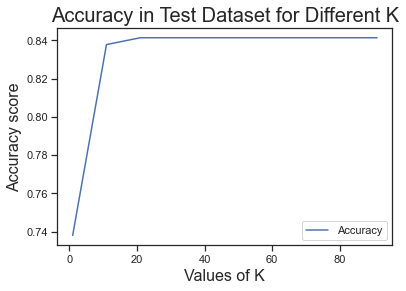

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#To store accuracy values for different k
accuracy_val = [] 

#To store  k values
k_val = []

#To store precision values for different k
precision_val=[]

#To store recall values for different k
recall_val=[]

#For loop for each K
for K in range(1, 101, 10):               #(Min,Max,Step)

    #Define knn as KNeighborsClassifier for each K intiated from for loop
    knn = KNeighborsClassifier(n_neighbors=K)
    
    #Fit the knn based on train data
    knn.fit(X_train, Y_train) 
    
    #Predict the RockType based on test data
    y_pred_knn = knn.predict(X_test)
    
    #Store the value of K
    k_val.append(K)
    
    #Store the value of accuracy
    accuracy_val.append(accuracy_score(Y_test, y_pred_knn))
    
    #Store the value of precision of each RockType
    precision_val.append(precision_score(Y_test, y_pred_knn, average=None))
    
    #Store the value of recall of each RockType
    recall_val.append(recall_score(Y_test, y_pred_knn, average=None))

    
#Plot K vs accuracy value at each K 
plt.plot(k_val, accuracy_val, label = 'Accuracy')
plt.xlabel ('Values of K', fontsize = 16)
plt.ylabel ('Accuracy score', fontsize = 16)
plt.title ('Accuracy in Test Dataset for Different K', fontsize = 20)
plt.legend()  

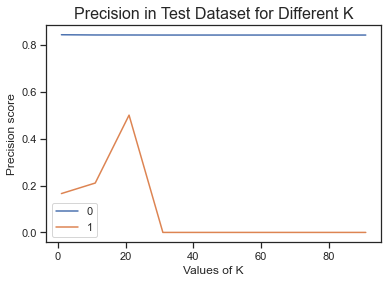

In [120]:
precision_val = np.array(precision_val)    

plt.plot(k_val, precision_val[:,0], label = '0')
plt.plot(k_val, precision_val[:,1], label = '1')
plt.xlabel ('Values of K')
plt.ylabel ('Precision score')
plt.title ('Precision in Test Dataset for Different K', fontsize = 16)
plt.legend()  

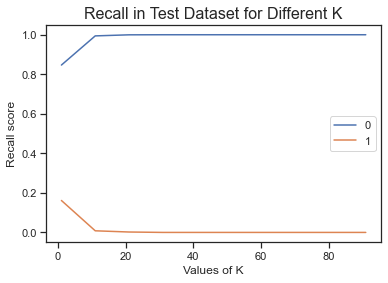

In [121]:
#converting nested list to np array
recall_val = np.array(recall_val)    

plt.plot(k_val, recall_val[:,0], label = '0' )
plt.plot(k_val, recall_val[:,1], label = '1' )
plt.xlabel ('Values of K')
plt.ylabel ('Recall score')
plt.title ('Recall in Test Dataset for Different K', fontsize = 16)
plt.legend()  

We will take K=20 as the optimal K as it gives the maximum Precision for the least computational demands

In [122]:
#Use knn at K=20
knn = KNeighborsClassifier(n_neighbors=20)

#Fit the knn based on train data
knn.fit(X_train, Y_train) 

#Predict the RockType based on test data
Y_pred_knn = knn.predict(X_test)


In [123]:
print ('Confusion Matrix :')
print (confusion_matrix(Y_test, Y_pred_knn)) 
print ('Accuracy Score : ', accuracy_score(Y_test, Y_pred_knn) )
print ('Report : ')
print (classification_report(Y_test, Y_pred_knn))

Confusion Matrix :
[[2594    1]
 [ 489    0]]
Accuracy Score :  0.8411154345006485
Report : 
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      2595
         1.0       0.00      0.00      0.00       489

    accuracy                           0.84      3084
   macro avg       0.42      0.50      0.46      3084
weighted avg       0.71      0.84      0.77      3084



### Run Final Prediction with Best Model

Transform test dataset

In [124]:
test_X
test_X = ct.transform(test_X)
test_X

array([[0.        , 0.        , 0.        , ..., 0.34782609, 0.        ,
        0.18181818],
       [0.        , 0.        , 0.        , ..., 0.95652174, 0.5       ,
        0.09090909],
       [0.        , 0.        , 0.        , ..., 0.39130435, 0.16666667,
        0.72727273],
       ...,
       [0.        , 0.        , 0.        , ..., 0.95652174, 0.5       ,
        0.09090909],
       [0.        , 0.        , 0.        , ..., 0.95652174, 0.5       ,
        0.09090909],
       [0.        , 0.        , 0.        , ..., 0.95652174, 0.5       ,
        0.09090909]])

In [125]:
len(test_X[0])

110

We can make use of any of the three classifiers. We will choose the support vector classifier in this case to make predictions.

In [126]:
predicted_vals = svcl.predict(test_X) #Saving classifier prediction

In [127]:
predicted_df['CLASSIFIER_PREDICTION'] = predicted_vals #Save predicted values into dataframe

In [128]:
predicted_df

RESTAURANT_SERIAL_NUMBER  CLASSIFIER_PREDICTION
0                   DA1050454                    0.0
1                   DA0986444                    0.0
2                   DA1284914                    0.0
3                   DA1281903                    0.0
4                   DA1004708                    0.0
...                       ...                    ...
7500                DA0922689                    0.0
7501                DA1031095                    0.0
7502                DA0633450                    0.0
7503                DA0998980                    0.0
7504                DA0831126                    0.0

[7505 rows x 2 columns]

In [129]:
y_pred_prob = svcl.predict_proba(test_X) #saving classifier probability

In [130]:
y_pred_prob 

array([[0.8418877 , 0.1581123 ],
       [0.84210037, 0.15789963],
       [0.80176254, 0.19823746],
       ...,
       [0.85390869, 0.14609131],
       [0.84189881, 0.15810119],
       [0.8419591 , 0.1580409 ]])

In [131]:
y_pred_prob = pd.DataFrame(y_pred_prob, columns = ['CLASSIFIER_PROBABILITY', 'CLASSIFIER_PROBABILITY_B']) #convert to pandas

In [132]:
predicted_df['CLASSIFIER_PROBABILITY']= y_pred_prob['CLASSIFIER_PROBABILITY'] #saving into dataframe

In [133]:
predicted_df

RESTAURANT_SERIAL_NUMBER  CLASSIFIER_PREDICTION  CLASSIFIER_PROBABILITY
0                   DA1050454                    0.0                0.841888
1                   DA0986444                    0.0                0.842100
2                   DA1284914                    0.0                0.801763
3                   DA1281903                    0.0                0.768115
4                   DA1004708                    0.0                0.842491
...                       ...                    ...                     ...
7500                DA0922689                    0.0                0.841998
7501                DA1031095                    0.0                0.842058
7502                DA0633450                    0.0                0.853909
7503                DA0998980                    0.0                0.841899
7504                DA0831126                    0.0                0.841959

[7505 rows x 3 columns]

Now we have Classifier Prediction  and Classifier Probability. Let us write to csv as follows:

In [134]:
predictions_Hamzat_Ayomide_Intern = predicted_df

In [135]:
result_columns = ['RESTAURANT_SERIAL_NUMBER', 'CLASSIFIER_PROBABILITY', 'CLASSIFIER_PREDICTION']
predictions_Hamzat_Ayomide_Intern = predictions_Hamzat_Ayomide_Intern.reindex(columns=result_columns)

In [136]:
predictions_Hamzat_Ayomide_Intern.to_csv(r'C:\Users\hamaz\Documents\predictions_Hamzat_Ayomide_Intern.csv', index=False)

## Recommendations to Improve Dataset and Predictive Modelling.

We have done a good job of maximizing precision in predicting whether or not a restaurant scores above a C in its next inspection. 

We however do not have satisfactory results regarding the null hypothesis: "Restaurant scores grade C and below". This is due in a large part to the dataset imbalance. To improve this, more sampling should be done on restaurants that scored grade C and below.

Other ways to improve the dataset is to sample for data on:

- Restaurant Capacity: The size of restaurants could provide us vital insights into a restaurants inspection score. I would expect that small size restaurants might struggle with sanitation requirements and overall customer service if they have large number of customers or a high number of daily guest visits.


- Daily Number of Guest Visits: This will be useful in conjunction with restaurant capacity as explained above. 


- Hours of Operation: Data on operating hours could also be very useful. Night time restaurants for example, might not focus on sanitation requirements as much during the day as they would in their peak night hours. This is especially important if the inspection visits are impromptu.


- Year of Establishment: This is solely to determine behavioural patterns in restaurants. Restaurants established in the 90s for instance might struggle to meet modern standards as easily as the modern ones do.


- Average Spending at Restaurants: Restaurants in which guests spend higher will at least try to justify the pricing with optimal service and sanitation practices.


- Mean Guest Age: We had data on the age distribution of the employees. The age distribution of the visiting guests might as well be useful. For example, an older employee may struggle to meet requirements for a younger guest. This may cause conflict/disagreement which an inspector might notice introducing some bias into the inspection.


- Restaurant Mode of Operation: Let us take the pandemic as an example. With restaurants reopening post-COVID, some have stuck to online delivery only, some do dine-in only, while others do both. This could influence practices within these companies.


- Nature of Environment/Settlement around Restaurant: This could be whether or not the restaurant is in a rural or urban community, the demographic of people in the settlement and so on. Some of this data can be obtained from data provided on restaurant location but will require extensive research and prior data manipulation which could take months.


In summary, we have been able to predict with 84% accuracy and 84% precision seeking to minimize false positive classifications of a restaurant scoring above a C. As always with data science, it could be improved upon. More data is the key.


## Ayomide Hamzat